In [1]:
!pip install tensorflow keras opencv-python-headless


  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/20/44/458a0a135866f5e08266566b32ad9a182a7a059a894effe6c41a9c841ff1/opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl (38.5 MB)


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [3]:
# Paths to my dataset
train_path = r'C:\Users\theop\Downloads\Face_expression_recognition_dataset\images\train'
validation_path = r'C:\Users\theop\Downloads\Face_expression_recognition_dataset\images\validation'

# Function to load images and labels
def load_data(dataset_path):
    images = []
    labels = []
    label_map = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}
    
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    image = cv2.resize(image, (48, 48))
                    images.append(image)
                    labels.append(label_map[label])
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the training dataset
train_images, train_labels = load_data(train_path)
print(f"Loaded {len(train_images)} training images with labels")

# Load the validation dataset
validation_images, validation_labels = load_data(validation_path)
print(f"Loaded {len(validation_images)} validation images with labels")


Loaded 28821 training images with labels
Loaded 7066 validation images with labels


In [4]:
# Normalize the images
train_images = train_images / 255.0
validation_images = validation_images / 255.0

# Reshape the images to add a channel dimension
train_images = train_images.reshape(train_images.shape[0], 48, 48, 1)
validation_images = validation_images.reshape(validation_images.shape[0], 48, 48, 1)

# Convert labels to categorical
train_labels = to_categorical(train_labels, num_classes=7)
validation_labels = to_categorical(validation_labels, num_classes=7)

# Print dataset sizes
print(f"Training set: {len(train_images)} samples, Validation set: {len(validation_images)} samples")


Training set: 28821 samples, Validation set: 7066 samples


In [5]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()


C:\Users\theop\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels))

# Evaluate the model
val_loss, val_acc = model.evaluate(validation_images, validation_labels, verbose=2)
print(f"Validation accuracy: {val_acc}")


Epoch 1/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.2956 - loss: 1.7251 - val_accuracy: 0.4619 - val_loss: 1.4077
Epoch 2/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.4779 - loss: 1.3721 - val_accuracy: 0.5067 - val_loss: 1.3024
Epoch 3/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 43s 47ms/step - accuracy: 0.5259 - loss: 1.2519 - val_accuracy: 0.5250 - val_loss: 1.2582
Epoch 4/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.5707 - loss: 1.1285 - val_accuracy: 0.5532 - val_loss: 1.1987
Epoch 5/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.6005 - loss: 1.0528 - val_accuracy: 0.5577 - val_loss: 1.1807
Epoch 6/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.6305 - loss: 0.9758 - val_accuracy: 0.5702 - val_loss: 1.1639
Epoch 7/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.6576 - loss: 0.9186 - val_accuracy: 0.5580 - val_loss: 1.1966
Epoch 8/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.6871 - loss: 0.8376 - 

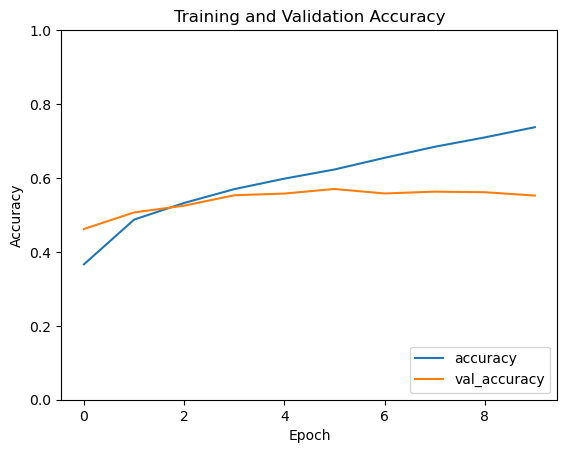

In [7]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


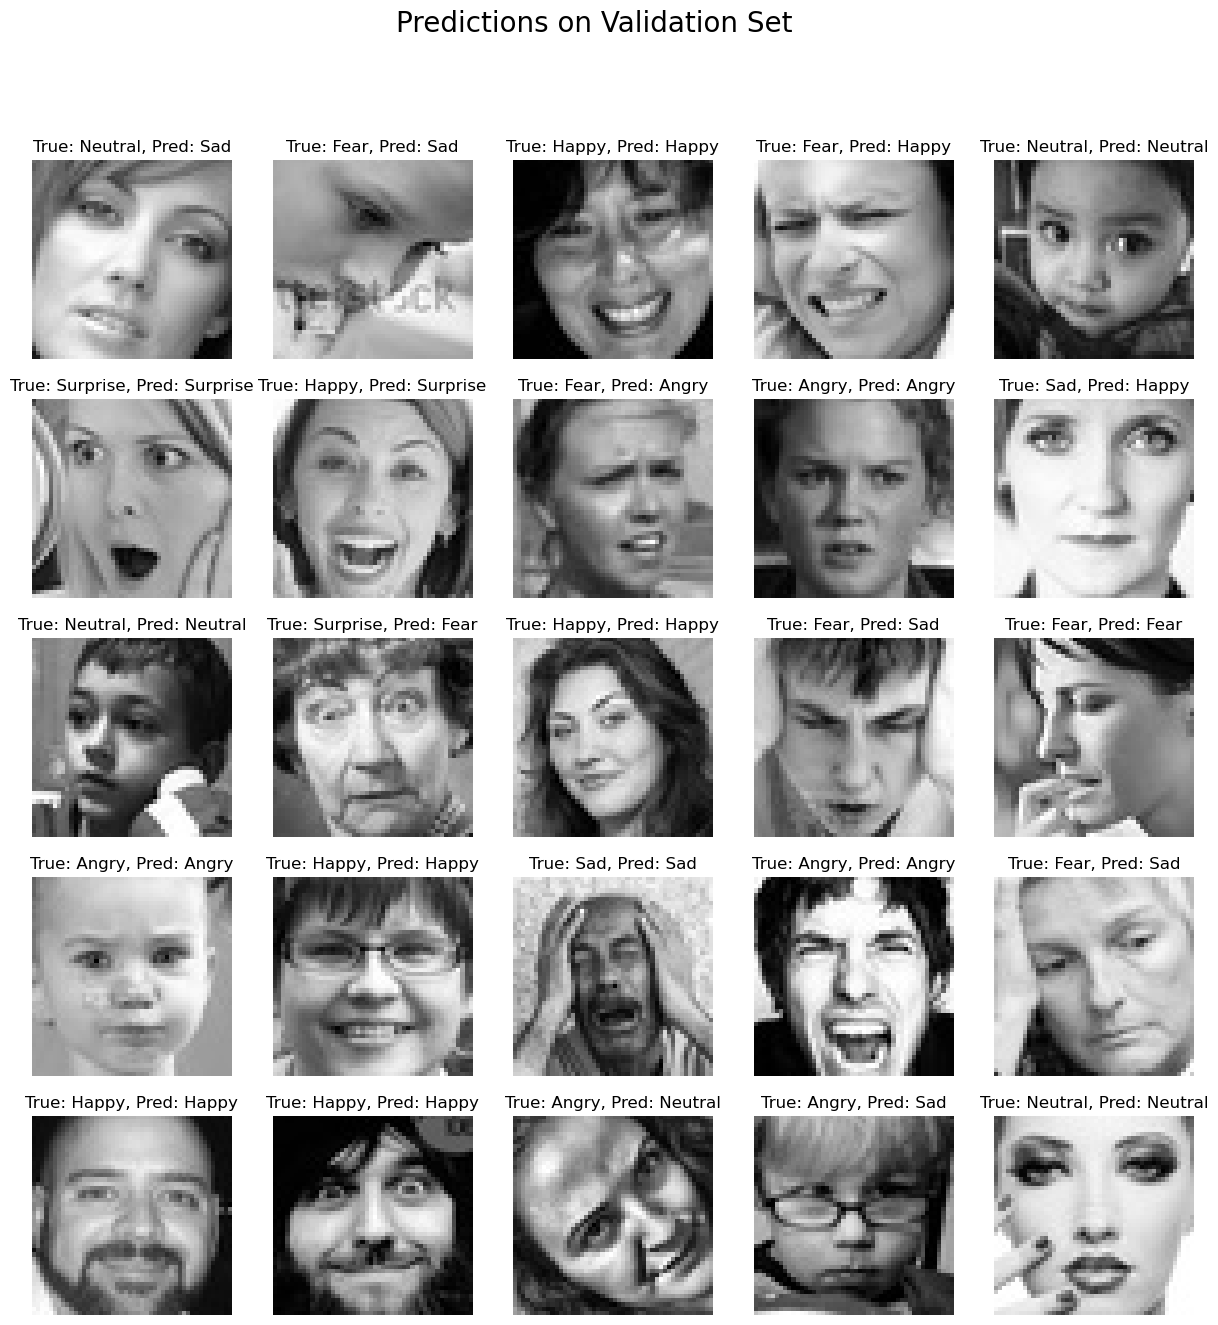

In [8]:
import random

def display_predictions(model, validation_images, validation_labels):
    fig, axes = plt.subplots(5, 5, figsize=(15, 15))
    fig.suptitle('Predictions on Validation Set', fontsize=20)
    axes = axes.flatten()
    emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

    for i in range(25):
        idx = random.randint(0, len(validation_images) - 1)
        img = validation_images[idx]
        true_label = np.argmax(validation_labels[idx])
        pred_label = np.argmax(model.predict(np.expand_dims(img, axis=0)))

        axes[i].imshow(img.squeeze(), cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f"True: {emotions[true_label]}, Pred: {emotions[pred_label]}")

    plt.show()

display_predictions(model, validation_images, validation_labels)


In [10]:
def preprocess_grayscale_to_rgb(image):
    return np.stack((image,)*3, axis=-1)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator with the custom preprocessing function
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_grayscale_to_rgb,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

# Freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
train_images_rgb = np.stack((train_images,) * 3, axis=-1)
validation_images_rgb = np.stack((validation_images,) * 3, axis=-1)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator with standard augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [16]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

# Freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
# Correct grayscale to RGB conversion
train_images_rgb = np.concatenate([train_images] * 3, axis=-1)
validation_images_rgb = np.concatenate([validation_images] * 3, axis=-1)

print(train_images_rgb.shape)  # Should be (28821, 48, 48, 3)
print(validation_images_rgb.shape)  # Should be (7066, 48, 48, 3)


(28821, 48, 48, 3)
(7066, 48, 48, 3)


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator with standard augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [20]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

# Freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
# Train the model with data augmentation and manually converted RGB images
history = model.fit(datagen.flow(train_images_rgb, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(validation_images_rgb, validation_labels))

# Evaluate the model
val_loss, val_acc = model.evaluate(validation_images_rgb, validation_labels, verbose=2)
print(f"Validation accuracy: {val_acc}")


Epoch 1/20


C:\Users\theop\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


901/901 ━━━━━━━━━━━━━━━━━━━━ 480s 528ms/step - accuracy: 0.2901 - loss: 1.7573 - val_accuracy: 0.3678 - val_loss: 1.6105
Epoch 2/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 459s 509ms/step - accuracy: 0.3264 - loss: 1.6733 - val_accuracy: 0.3835 - val_loss: 1.5866
Epoch 3/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 437s 485ms/step - accuracy: 0.3436 - loss: 1.6510 - val_accuracy: 0.3838 - val_loss: 1.5815
Epoch 4/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 453s 503ms/step - accuracy: 0.3487 - loss: 1.6407 - val_accuracy: 0.3841 - val_loss: 1.5704
Epoch 5/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 2468s 3s/step - accuracy: 0.3524 - loss: 1.6296 - val_accuracy: 0.3800 - val_loss: 1.5860
Epoch 6/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 506s 561ms/step - accuracy: 0.3516 - loss: 1.6275 - val_accuracy: 0.3927 - val_loss: 1.5644
Epoch 7/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 494s 548ms/step - accuracy: 0.3563 - loss: 1.6205 - val_accuracy: 0.3889 - val_loss: 1.5731
Epoch 8/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 450s 499ms/step - accuracy: 0.3615 - loss: 1.6126

In [22]:
# Unfreeze the top layers of VGG16
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,255 (56.39 MB)

 Trainable params: 7,145,991 (27.26 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [23]:
# Train the model with data augmentation and fine-tuning
history = model.fit(datagen.flow(train_images_rgb, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(validation_images_rgb, validation_labels))

# Evaluate the model
val_loss, val_acc = model.evaluate(validation_images_rgb, validation_labels, verbose=2)
print(f"Validation accuracy: {val_acc}")


Epoch 1/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 712s 784ms/step - accuracy: 0.3869 - loss: 1.5576 - val_accuracy: 0.4318 - val_loss: 1.4787
Epoch 2/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 625s 693ms/step - accuracy: 0.4113 - loss: 1.5137 - val_accuracy: 0.4510 - val_loss: 1.4493
Epoch 3/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 630s 700ms/step - accuracy: 0.4258 - loss: 1.4801 - val_accuracy: 0.4587 - val_loss: 1.4168
Epoch 4/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 793s 880ms/step - accuracy: 0.4444 - loss: 1.4483 - val_accuracy: 0.4752 - val_loss: 1.3805
Epoch 5/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 640s 711ms/step - accuracy: 0.4465 - loss: 1.4362 - val_accuracy: 0.4834 - val_loss: 1.3618
Epoch 6/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 644s 715ms/step - accuracy: 0.4586 - loss: 1.4186 - val_accuracy: 0.4870 - val_loss: 1.3555
Epoch 7/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 1079s 1s/step - accuracy: 0.4643 - loss: 1.3922 - val_accuracy: 0.4902 - val_loss: 1.3431
Epoch 8/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 602s 668ms/step - accuracy: 0.4690 - l

In [24]:
# Correct grayscale to RGB conversion
train_images_rgb = np.concatenate([train_images] * 3, axis=-1)
validation_images_rgb = np.concatenate([validation_images] * 3, axis=-1)

print(train_images_rgb.shape)  # Should be (28821, 48, 48, 3)
print(validation_images_rgb.shape)  # Should be (7066, 48, 48, 3)


(28821, 48, 48, 3)
(7066, 48, 48, 3)


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator with standard augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

# Freeze all layers initially
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze the top layers of VGG16
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Compile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [27]:
# Train the model with data augmentation and fine-tuning
history = model.fit(datagen.flow(train_images_rgb, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(validation_images_rgb, validation_labels))

# Evaluate the model
val_loss, val_acc = model.evaluate(validation_images_rgb, validation_labels, verbose=2)
print(f"Validation accuracy: {val_acc}")


Epoch 1/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 595s 655ms/step - accuracy: 0.2984 - loss: 1.7293 - val_accuracy: 0.3922 - val_loss: 1.5729
Epoch 2/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 606s 672ms/step - accuracy: 0.3839 - loss: 1.5786 - val_accuracy: 0.4492 - val_loss: 1.4432
Epoch 3/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 601s 666ms/step - accuracy: 0.4089 - loss: 1.5240 - val_accuracy: 0.4570 - val_loss: 1.4187
Epoch 4/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 602s 668ms/step - accuracy: 0.4267 - loss: 1.4920 - val_accuracy: 0.4742 - val_loss: 1.3852
Epoch 5/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 601s 667ms/step - accuracy: 0.4365 - loss: 1.4534 - val_accuracy: 0.4786 - val_loss: 1.3756
Epoch 6/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 606s 672ms/step - accuracy: 0.4481 - loss: 1.4361 - val_accuracy: 0.4902 - val_loss: 1.3262
Epoch 7/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 601s 667ms/step - accuracy: 0.4578 - loss: 1.4185 - val_accuracy: 0.5006 - val_loss: 1.3122
Epoch 8/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 604s 670ms/step - accuracy: 0.4616 -

In [28]:
# Correct grayscale to RGB conversion
train_images_rgb = np.concatenate([train_images] * 3, axis=-1)
validation_images_rgb = np.concatenate([validation_images] * 3, axis=-1)

print(train_images_rgb.shape)  # Should be (28821, 48, 48, 3)
print(validation_images_rgb.shape)  # Should be (7066, 48, 48, 3)


(28821, 48, 48, 3)
(7066, 48, 48, 3)


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator with standard augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [30]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of VGG16 with increased complexity and dropout
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Unfreeze more layers of VGG16 for fine-tuning
for layer in base_model.layers[-8:]:
    layer.trainable = True

# Compile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Train the model with data augmentation and fine-tuning
history = model.fit(datagen.flow(train_images_rgb, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(validation_images_rgb, validation_labels))

# Evaluate the model
val_loss, val_acc = model.evaluate(validation_images_rgb, validation_labels, verbose=2)
print(f"Validation accuracy: {val_acc}")


Epoch 1/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 1511s 2s/step - accuracy: 0.1691 - loss: 2.0512 - val_accuracy: 0.3224 - val_loss: 1.7656
Epoch 2/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 1558s 2s/step - accuracy: 0.2671 - loss: 1.8067 - val_accuracy: 0.4445 - val_loss: 1.4765
Epoch 3/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 1521s 2s/step - accuracy: 0.3663 - loss: 1.6373 - val_accuracy: 0.4789 - val_loss: 1.4080
Epoch 4/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 1393s 2s/step - accuracy: 0.4195 - loss: 1.5166 - val_accuracy: 0.5209 - val_loss: 1.2835
Epoch 5/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 1712s 2s/step - accuracy: 0.4487 - loss: 1.4486 - val_accuracy: 0.5439 - val_loss: 1.2373
Epoch 6/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 1637s 2s/step - accuracy: 0.4751 - loss: 1.4096 - val_accuracy: 0.5566 - val_loss: 1.1996
Epoch 7/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 1630s 2s/step - accuracy: 0.4978 - loss: 1.3515 - val_accuracy: 0.5650 - val_loss: 1.1792
Epoch 8/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 1402s 2s/step - accuracy: 0.5078 - loss: 1.3283 - 

In [60]:
# Save the first model
model.save('emotion_model_first.h5')
print("First emotion model saved successfully")


First emotion model saved successfully


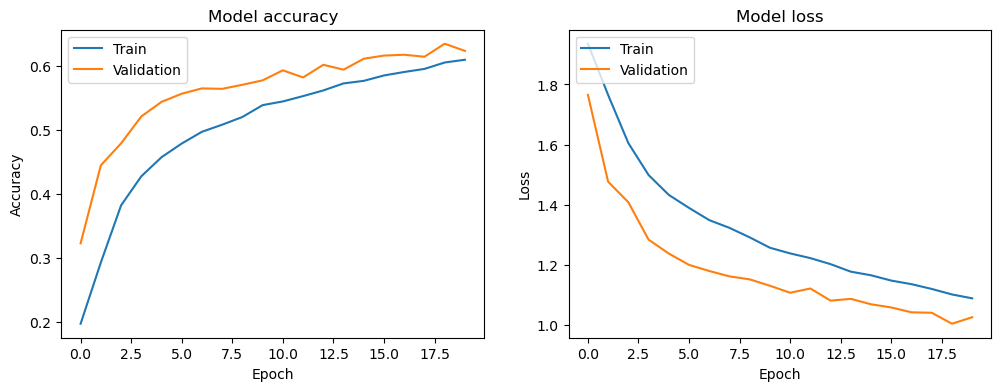

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


221/221 ━━━━━━━━━━━━━━━━━━━━ 91s 408ms/step


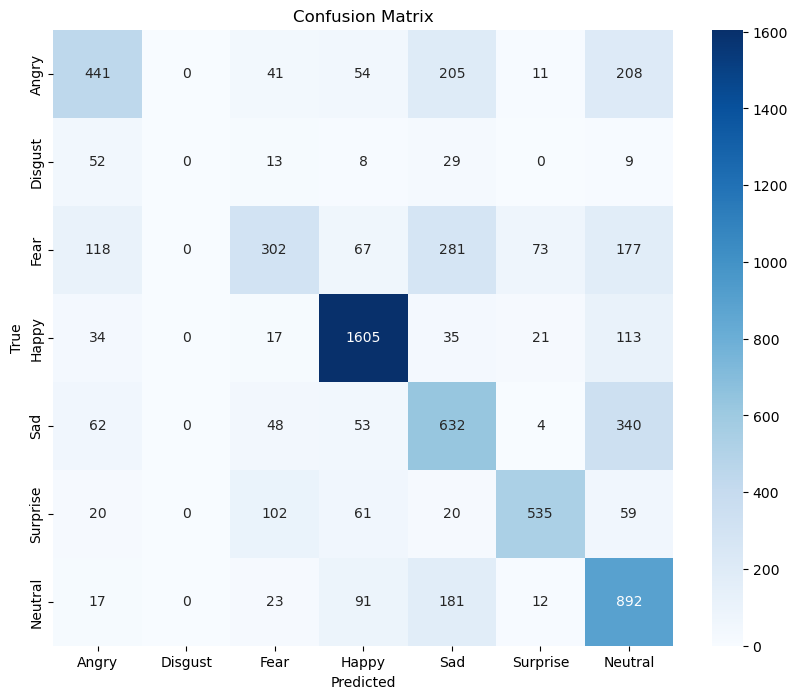

              precision    recall  f1-score   support

       Angry       0.59      0.46      0.52       960
     Disgust       0.00      0.00      0.00       111
        Fear       0.55      0.30      0.39      1018
       Happy       0.83      0.88      0.85      1825
         Sad       0.46      0.55      0.50      1139
    Surprise       0.82      0.67      0.74       797
     Neutral       0.50      0.73      0.59      1216

    accuracy                           0.62      7066
   macro avg       0.53      0.51      0.51      7066
weighted avg       0.63      0.62      0.61      7066



C:\Users\theop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\theop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\theop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the labels for validation data
val_predictions = model.predict(validation_images_rgb)
val_pred_labels = np.argmax(val_predictions, axis=1)
true_labels = np.argmax(validation_labels, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, val_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'], yticklabels=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_labels, val_pred_labels, target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']))


In [34]:
import cv2

# Load the pre-trained model for real-time prediction
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=0)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

    for (x, y, w, h) in faces:
        face = gray_frame[y:y + h, x:x + w]
        face = preprocess_image(face)
        prediction = model.predict(face)
        emotion_label = emotions[np.argmax(prediction)]

        # Draw rectangle around face and put the emotion label
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Display the resulting frame
    cv2.imshow('Emotion Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


C:\Users\theop\AppData\Local\Temp\ipykernel_9604\665433390.py:47: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, interval=50)


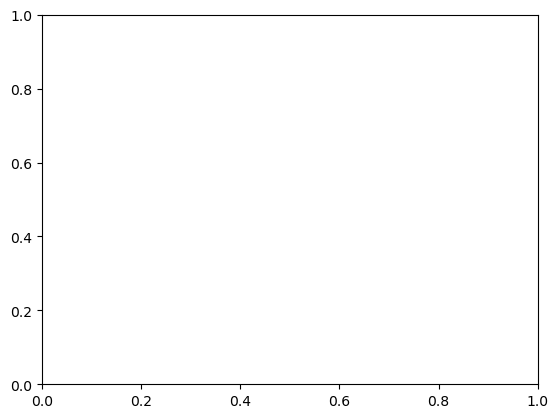

In [35]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the pre-trained model for real-time prediction
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=0)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

fig, ax = plt.subplots()

def update(frame):
    ret, frame = cap.read()
    if not ret:
        return

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

    for (x, y, w, h) in faces:
        face = gray_frame[y:y + h, x:x + w]
        face = preprocess_image(face)
        prediction = model.predict(face)
        emotion_label = emotions[np.argmax(prediction)]

        # Draw rectangle around face and put the emotion label
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Convert BGR to RGB for display
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ax.clear()
    ax.imshow(frame_rgb)
    ax.axis('off')

ani = FuncAnimation(fig, update, interval=50)
plt.show()

# Release the capture when done
cap.release()


Webcam opened successfully.


C:\Users\theop\AppData\Local\Temp\ipykernel_9604\1579168668.py:53: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, interval=50)


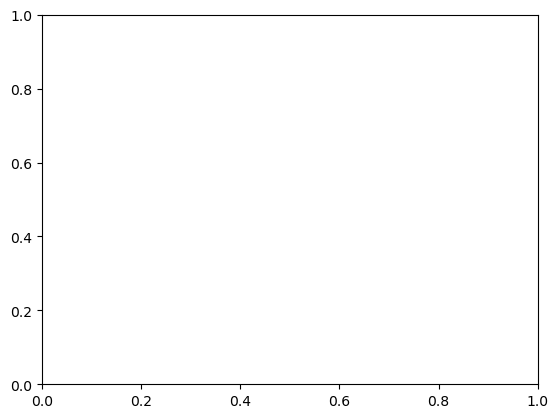

In [37]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the pre-trained model for real-time prediction
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=0)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

fig, ax = plt.subplots()

def update(frame):
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        return

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

    for (x, y, w, h) in faces:
        face = gray_frame[y:y + h, x:x + w]
        face = preprocess_image(face)
        prediction = model.predict(face)
        emotion_label = emotions[np.argmax(prediction)]

        # Draw rectangle around face and put the emotion label
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Convert BGR to RGB for display
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ax.clear()
    ax.imshow(frame_rgb)
    ax.axis('off')

ani = FuncAnimation(fig, update, interval=50)
plt.show()

# Release the capture when done
cap.release()


Webcam opened successfully.


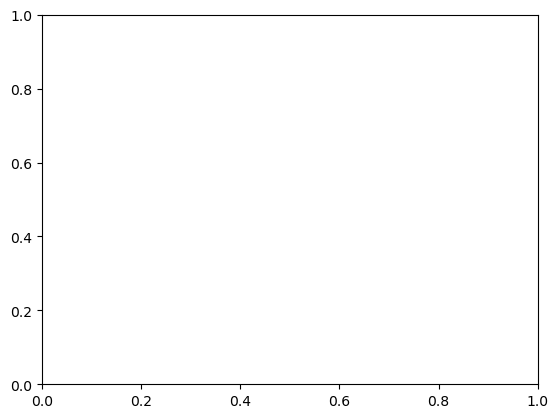

In [38]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the pre-trained model for real-time prediction
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=0)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

fig, ax = plt.subplots()

def update(frame):
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        return

    print("Frame read successfully.")

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

    if len(faces) > 0:
        print(f"Detected {len(faces)} face(s).")
    else:
        print("No faces detected.")

    for (x, y, w, h) in faces:
        face = gray_frame[y:y + h, x:x + w]
        face = preprocess_image(face)
        prediction = model.predict(face)
        emotion_label = emotions[np.argmax(prediction)]

        # Draw rectangle around face and put the emotion label
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Convert BGR to RGB for display
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ax.clear()
    ax.imshow(frame_rgb)
    ax.axis('off')

ani = FuncAnimation(fig, update, interval=50, cache_frame_data=False)
plt.show()

# Release the capture when done
cap.release()


Webcam opened successfully.


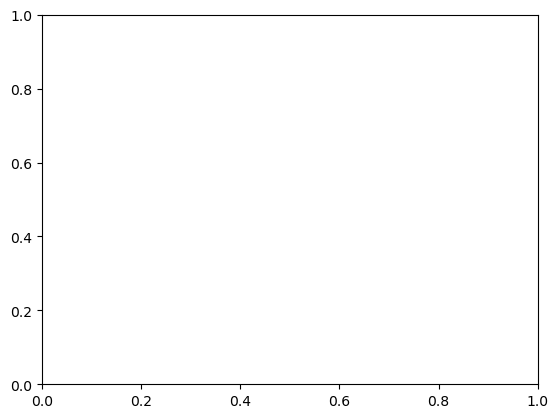

In [39]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the pre-trained model for real-time prediction
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=0)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

fig, ax = plt.subplots()

def update(frame):
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        return

    print("Frame read successfully.")

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print("Converted to grayscale.")

    # Detect faces in the frame
    faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

    if len(faces) > 0:
        print(f"Detected {len(faces)} face(s).")
    else:
        print("No faces detected.")

    for (x, y, w, h) in faces:
        face = gray_frame[y:y + h, x:x + w]
        face = preprocess_image(face)
        prediction = model.predict(face)
        emotion_label = emotions[np.argmax(prediction)]

        # Draw rectangle around face and put the emotion label
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)
        print(f"Predicted emotion: {emotion_label}")

    # Convert BGR to RGB for display
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    print("Converted to RGB for display.")
    ax.clear()
    ax.imshow(frame_rgb)
    ax.axis('off')
    print("Frame displayed.")

ani = FuncAnimation(fig, update, interval=50, cache_frame_data=False)
plt.show()

# Release the capture when done
cap.release()


Webcam opened successfully.


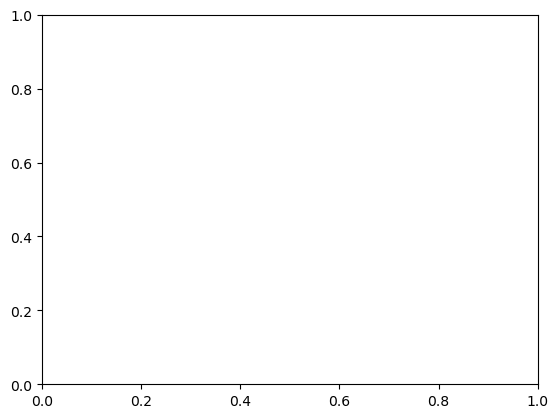

In [40]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

fig, ax = plt.subplots()

def update(frame):
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        return

    print("Frame read successfully.")
    print("Frame shape:", frame.shape)

    # Convert BGR to RGB for display
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    print("Converted to RGB for display.")
    ax.clear()
    ax.imshow(frame_rgb)
    ax.axis('off')
    print("Frame displayed.")

ani = FuncAnimation(fig, update, interval=50, cache_frame_data=False)
plt.show()

# Release the capture when done
cap.release()


In [41]:
import cv2

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break

    print("Frame read successfully.")
    print("Frame shape:", frame.shape)

    # Display the resulting frame
    cv2.imshow('Webcam Feed', frame)

    # Press 'q' to exit the loop and close the window
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture when done
cap.release()
cv2.destroyAllWindows()


Webcam opened successfully.
Frame read successfully.
Frame shape: (480, 640, 3)


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


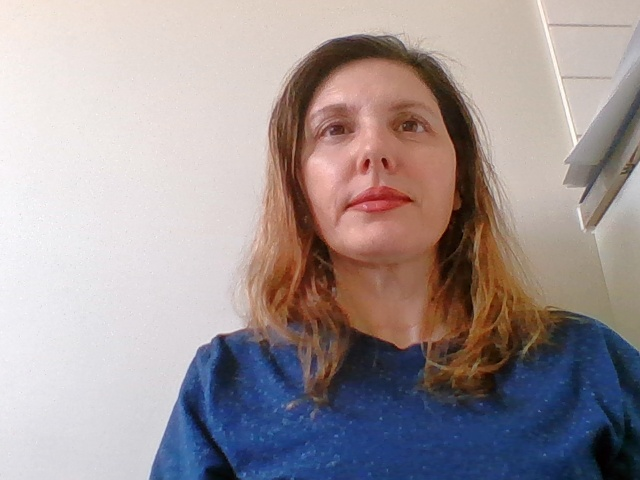

Stopped.


In [57]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        print("Frame read successfully.")
        print("Frame shape:", frame.shape)

        # Convert the frame to JPEG format
        _, buffer = cv2.imencode('.jpg', frame)
        frame_image = Image(data=buffer.tobytes())

        # Display the resulting frame in Jupyter Notebook
        clear_output(wait=True)
        display(frame_image)

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()


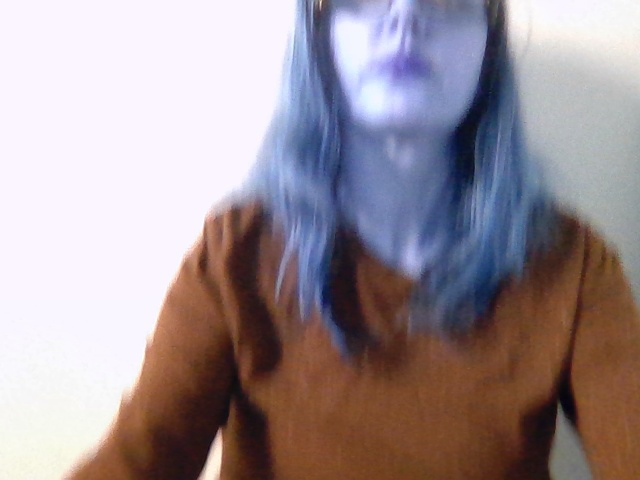

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_6_1/Cast:0", shape=(1, 48, 144), dtype=float32). Expected shape (None, 48, 48, 3), but input has incompatible shape (1, 48, 144)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 48, 144), dtype=uint8)
  • training=False
  • mask=None

In [60]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np

# Load my pre-trained model
# `model` is already defined and loaded

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=0)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]  # Corrected indexing here
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()


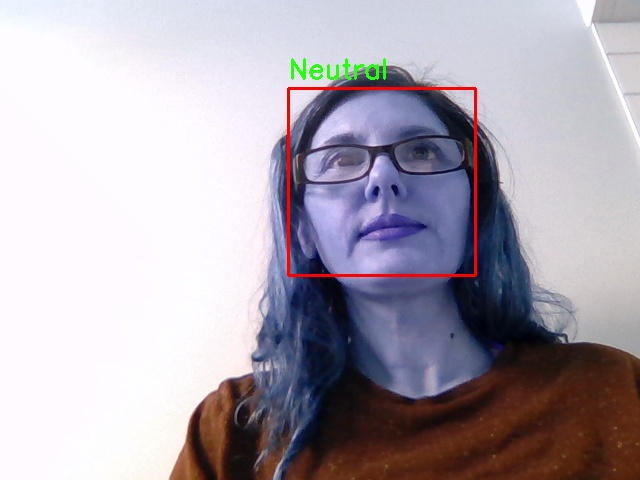

Stopped.


In [61]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np

# Load my pre-trained model
#  model is already defined and loaded

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()


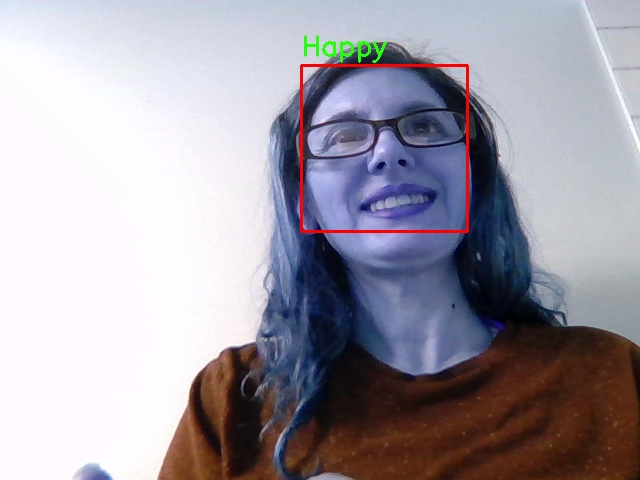

Stopped.


In [63]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np

# Load my pre-trained model
# `model` is already defined and loaded

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()


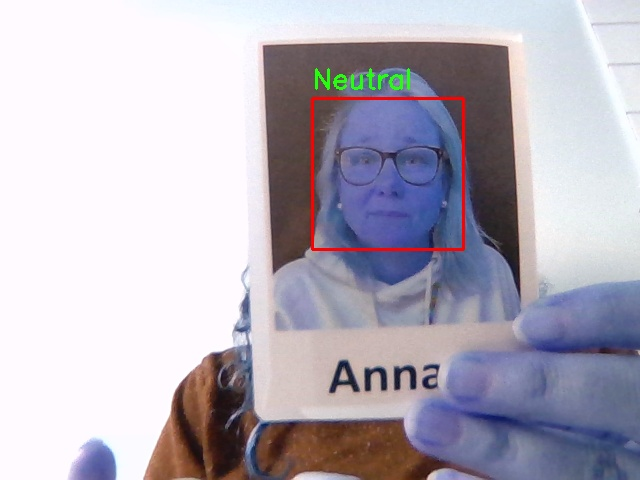

Stopped.


In [64]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np

# Load my pre-trained model
# `model` is already defined and loaded

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()


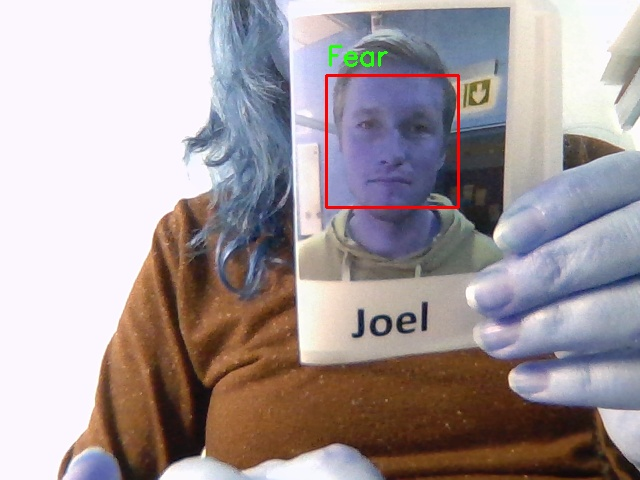

Stopped.


In [67]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np

# Load my pre-trained model
# `model` is already defined and loaded

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()


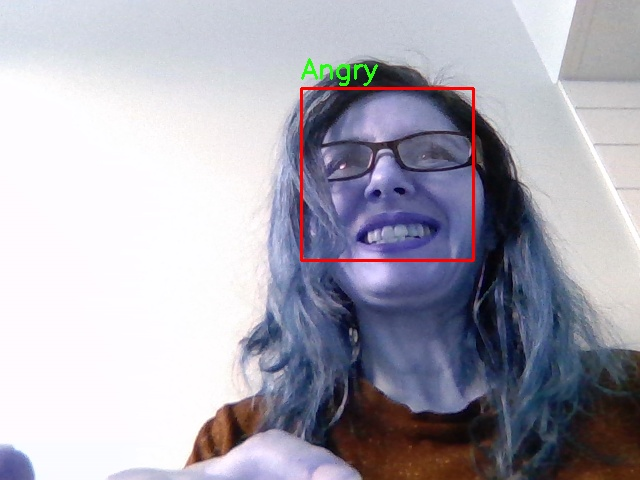

Stopped.


In [68]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np

# Load my pre-trained model
# `model` is already defined and loaded

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()


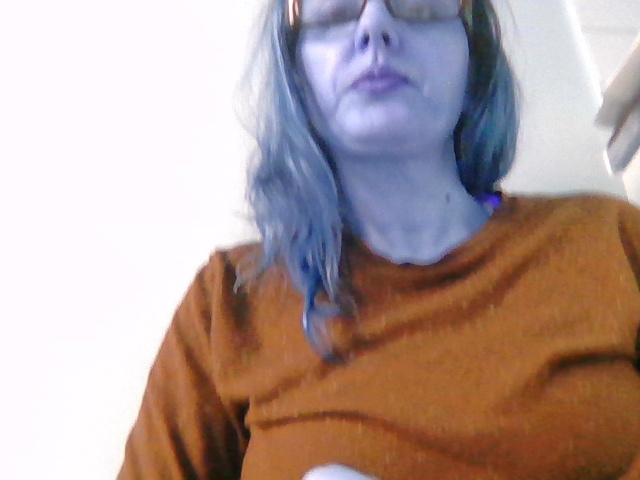

NameError: name 'model' is not defined

In [2]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np

# Load my pre-trained model
# `model` is already defined and loaded

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()


In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of VGG16 with increased complexity and dropout
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Unfreeze more layers of VGG16 for fine-tuning
for layer in base_model.layers[-8:]:
    layer.trainable = True

# Compile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

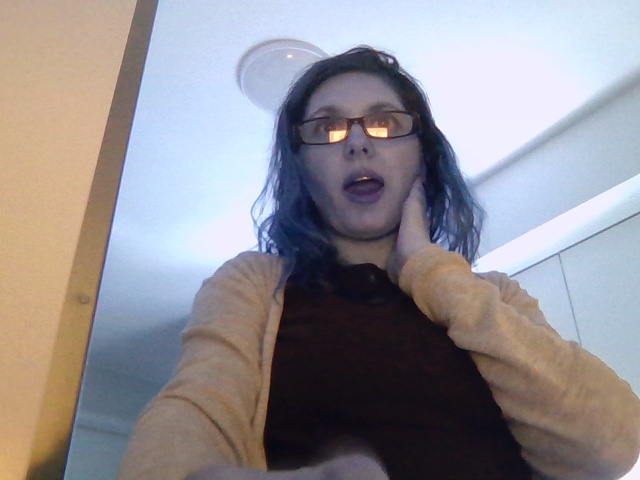

Stopped.


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [6]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x + w]  # Corrected indexing
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    cv2.destroyAllWindows()
    print("Resources released.")


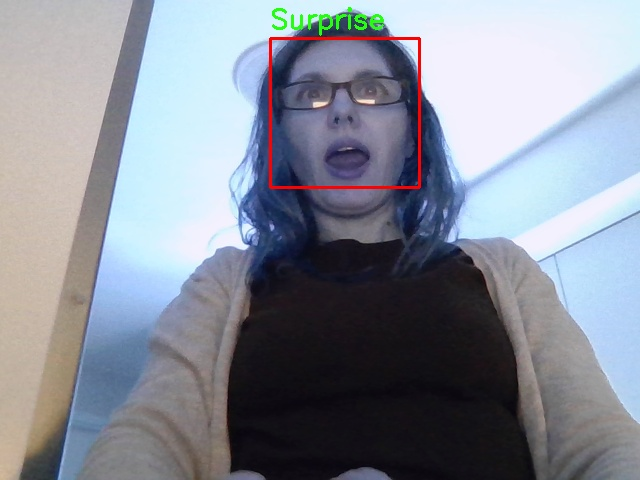

Stopped.
Resources released.


In [7]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]  # Corrected indexing
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


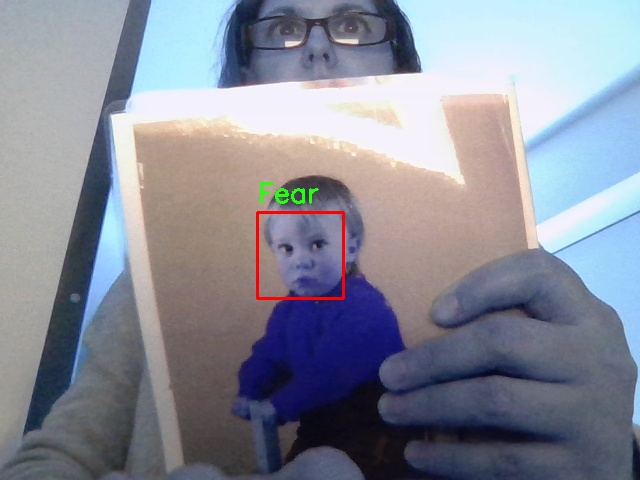

Frame read successfully.
Stopped.
Resources released.


In [8]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        print("Frame read successfully.")  # Added confirmation of frame read

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            print(f"Predicted emotion: {emotion_label}")  # Added confirmation of prediction

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


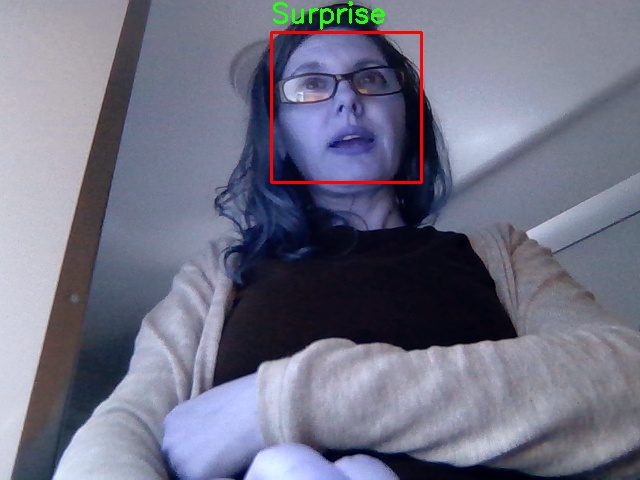

Stopped.
Resources released.


In [9]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        print("Frame read successfully.")  # Added confirmation of frame read

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            print(f"Predicted emotion: {emotion_label}")  # Added confirmation of prediction

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


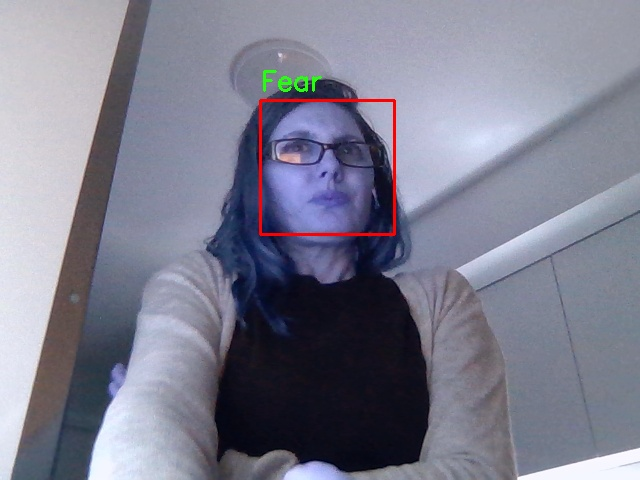

Frame read successfully.
Stopped.
Resources released.


In [10]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        print("Frame read successfully.")

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Print the prediction probabilities
            print(f"Prediction probabilities: {prediction}")
            print(f"Predicted emotion: {emotion_label}")

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


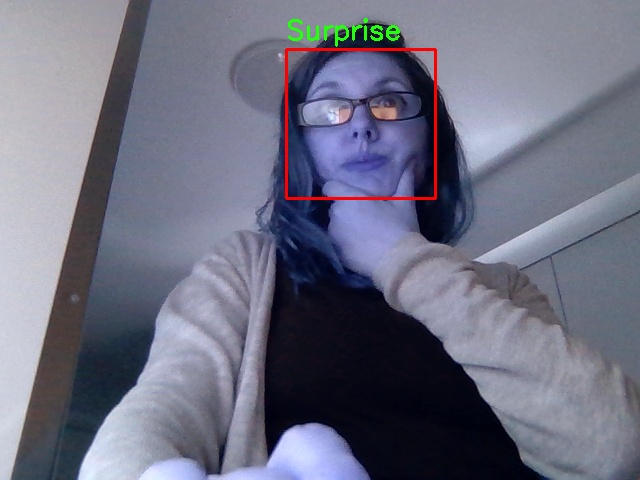

Frame read successfully.
Stopped.
Resources released.


In [11]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        print("Frame read successfully.")

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Print the prediction probabilities
            print(f"Prediction probabilities: {prediction}")
            print(f"Predicted emotion: {emotion_label}")

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


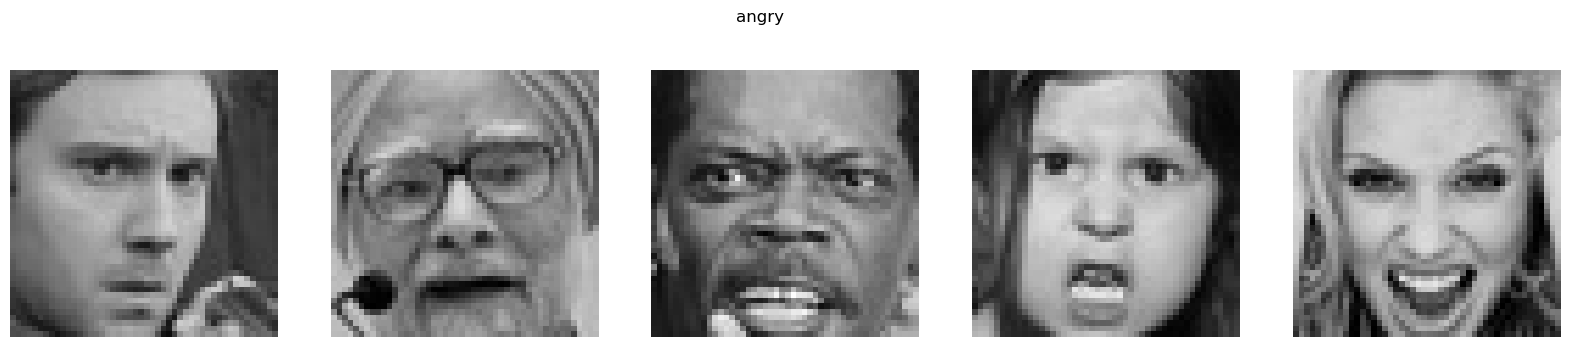

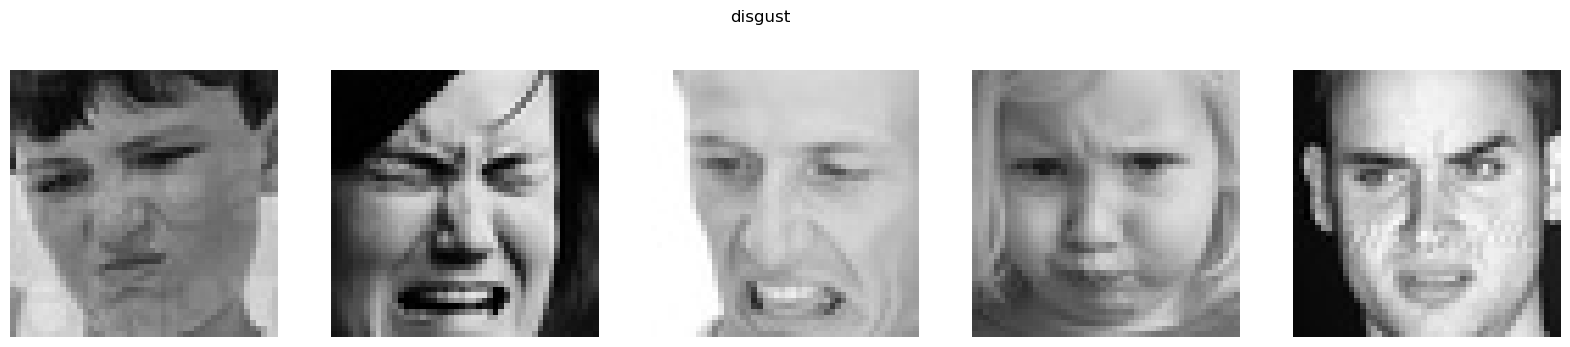

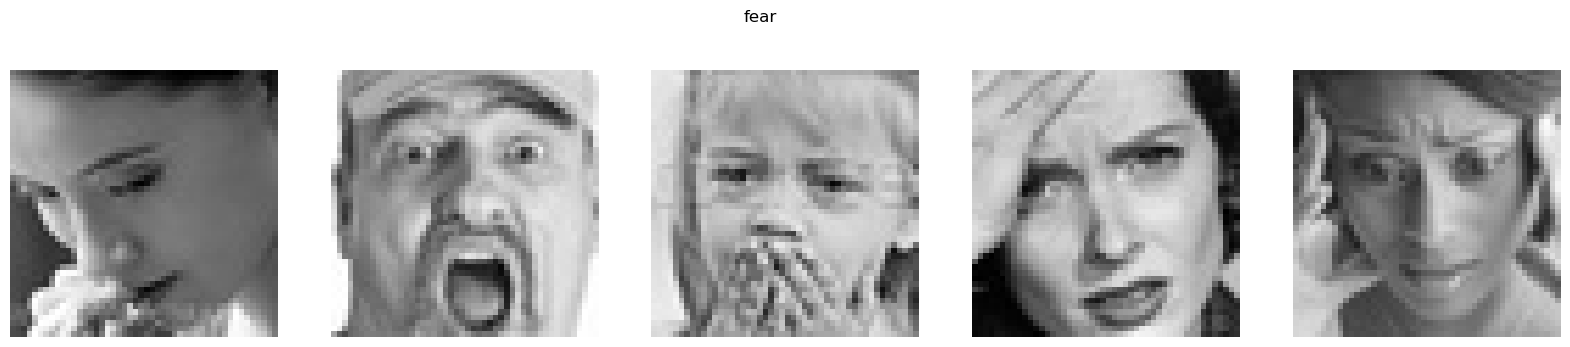

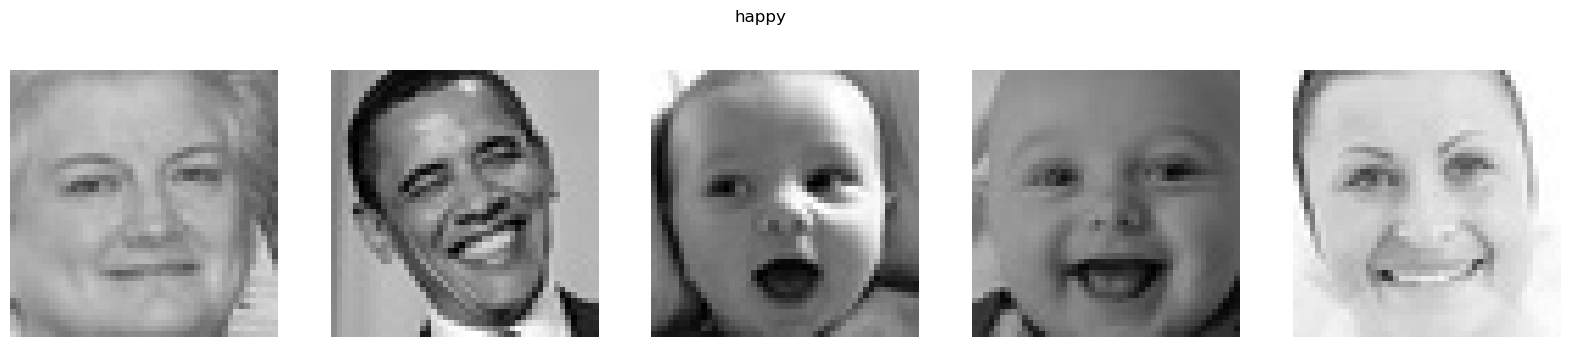

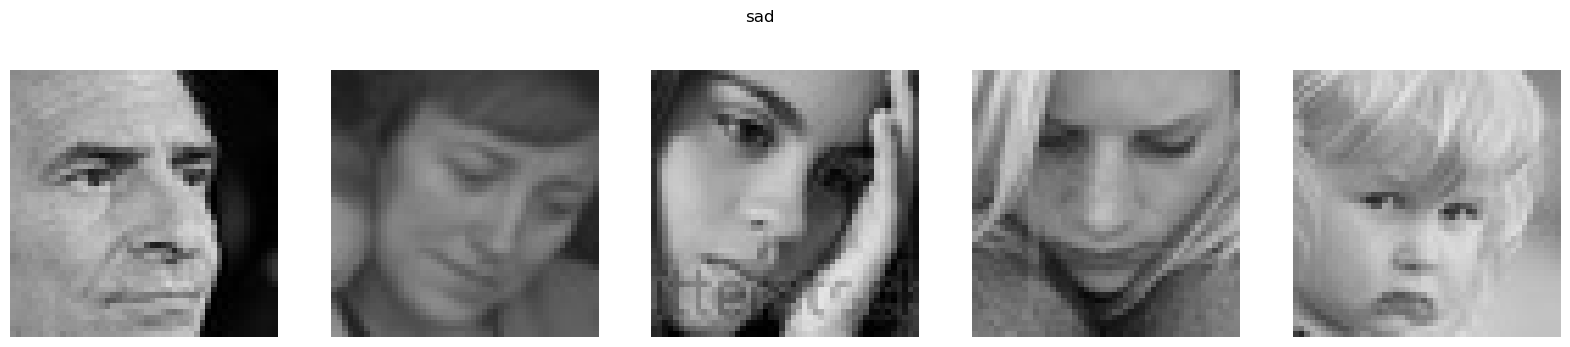

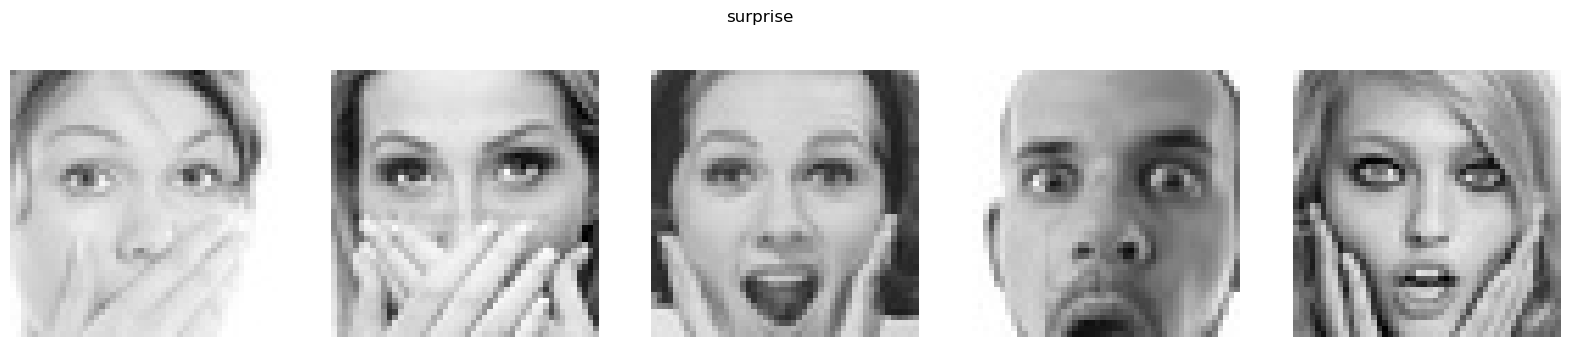

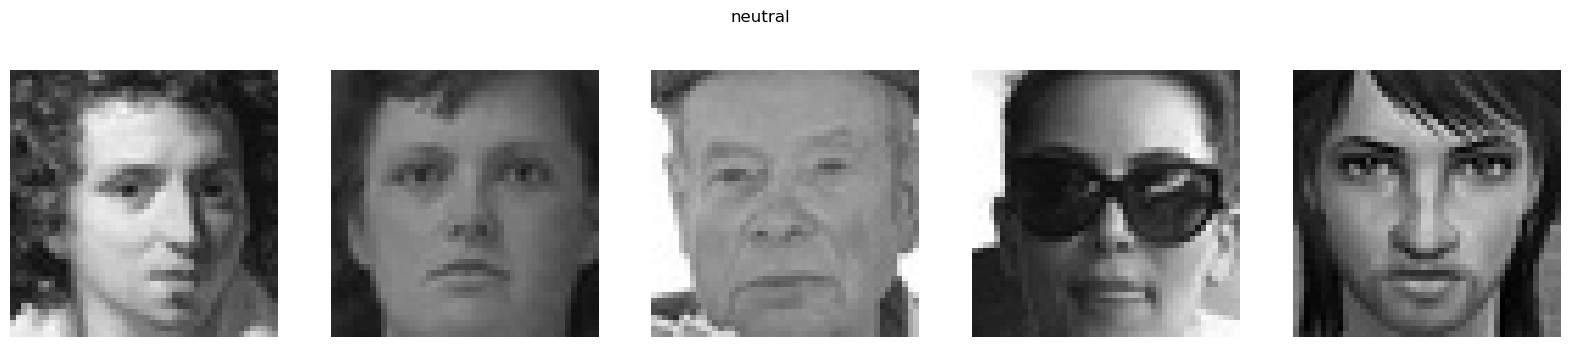

In [12]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to my dataset
train_dir = "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/train"

# Display a few images from each class
def display_samples(class_name):
    class_path = os.path.join(train_dir, class_name)
    images = os.listdir(class_path)[:5]  # Display first 5 images
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for img, ax in zip(images, axes):
        img_path = os.path.join(class_path, img)
        image = load_img(img_path, target_size=(48, 48))
        image = img_to_array(image)
        ax.imshow(image.astype('uint8'))
        ax.axis('off')
    plt.suptitle(class_name)
    plt.show()

# List of emotion classes
emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

for class_name in emotion_classes:
    display_samples(class_name)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1, 48, 48, 1, 3), dtype=float32). Expected shape (None, 48, 48, 3), but input has incompatible shape (1, 48, 48, 1, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 48, 48, 1, 3), dtype=float32)
  • training=False
  • mask=None

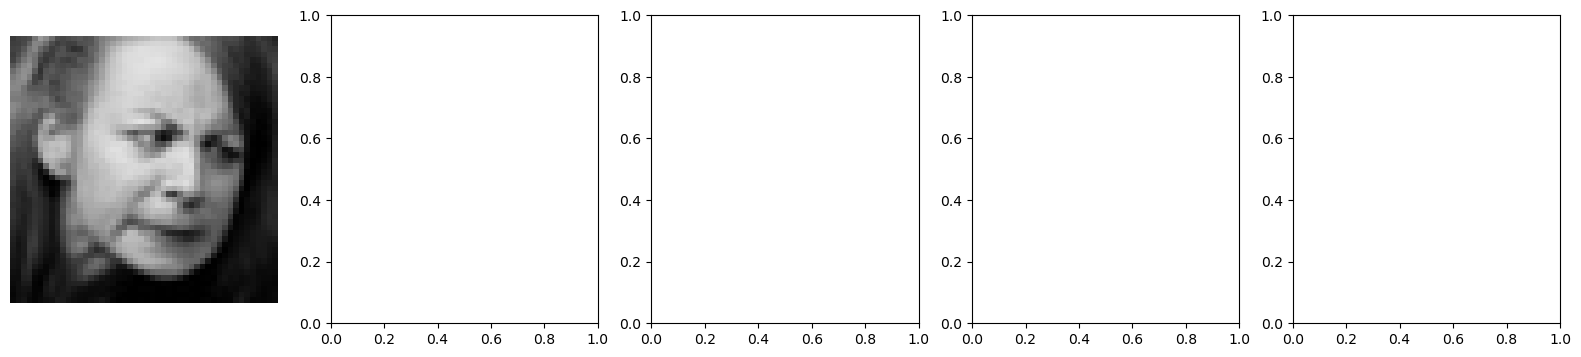

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Path to my validation dataset
validation_dir = "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation"

# List of emotion classes
emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Function to preprocess and predict emotion for a single image
def predict_emotion(image_path):
    image = load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    image = img_to_array(image)
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model.predict(image)
    emotion_label = emotion_classes[np.argmax(prediction)]
    return emotion_label, prediction

# Display a few images from each class and their predictions
def display_and_predict_samples(class_name):
    class_path = os.path.join(validation_dir, class_name)
    images = os.listdir(class_path)[:5]  # Display and predict for first 5 images
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for img, ax in zip(images, axes):
        img_path = os.path.join(class_path, img)
        image = load_img(img_path, target_size=(48, 48))
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        predicted_emotion, prediction = predict_emotion(img_path)
        ax.set_title(f"Predicted: {predicted_emotion}\nActual: {class_name}")
        print(f"Image: {img} - Predicted: {predicted_emotion} - Actual: {class_name} - Prediction: {prediction}")
    plt.suptitle(f"Class: {class_name}")
    plt.show()

for class_name in emotion_classes:
    display_and_predict_samples(class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Image: 10052.jpg - Predicted: fear - Actual: angry - Prediction: [[1.1138277e-32 1.3171731e-19 1.0000000e+00 2.6454828e-25 4.6184629e-26
  2.2893584e-12 3.0284871e-37]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: 10065.jpg - Predicted: surprise - Actual: angry - Prediction: [[2.6457517e-35 3.2855101e-30 3.1888232e-09 4.6983569e-26 1.7959640e-28
  1.0000000e+00 0.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: 10079.jpg - Predicted: fear - Actual: angry - Prediction: [[2.0128559e-29 1.0948622e-16 8.7962949e-01 2.1322485e-26 1.2489525e-22
  1.2037053e-01 0.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: 10095.jpg - Predicted: surprise - Actual: angry - Prediction: [[2.0995872e-21 2.1429081e-11 9.2026316e-02 7.9388766e-16 4.6940494e-19
  9.0797365e-01 2.7372987e-31]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Image: 10121.jpg - Predicted: surprise - Actual: angry - Prediction: [[3.5889551e-22 2.2890974e-11 3.6959618e-01 1.2398430e-0

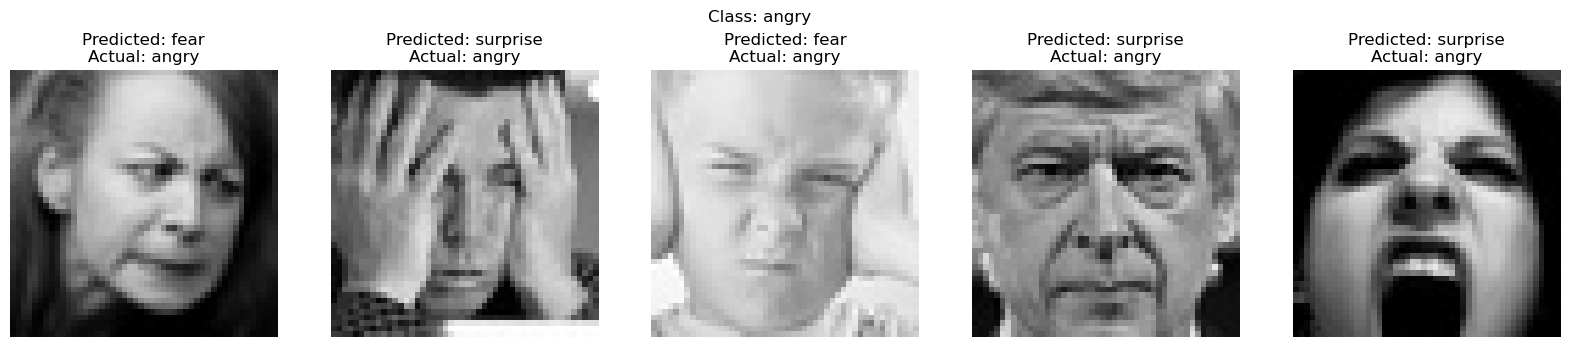

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: 10053.jpg - Predicted: fear - Actual: disgust - Prediction: [[3.8017374e-18 7.2417869e-13 9.6926558e-01 2.7264240e-13 1.4503794e-15
  3.0734384e-02 1.6140914e-19]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: 10435.jpg - Predicted: surprise - Actual: disgust - Prediction: [[1.7175699e-24 1.9833338e-10 6.7231604e-03 1.3251126e-13 1.8910083e-15
  9.9327677e-01 2.0843803e-25]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: 10532.jpg - Predicted: fear - Actual: disgust - Prediction: [[4.0603255e-21 6.4000694e-10 9.9855345e-01 1.0605167e-11 1.5296087e-13
  1.4465911e-03 1.3390497e-22]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Image: 1115.jpg - Predicted: surprise - Actual: disgust - Prediction: [[3.3350448e-25 4.2113347e-14 3.2976228e-03 2.9960047e-14 3.1695596e-13
  9.9670237e-01 1.1555035e-29]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: 11222.jpg - Predicted: surprise - Actual: disgust - Prediction: [[2.1074733e-27 7.8960062e-16 1.7896092e-01 6.53

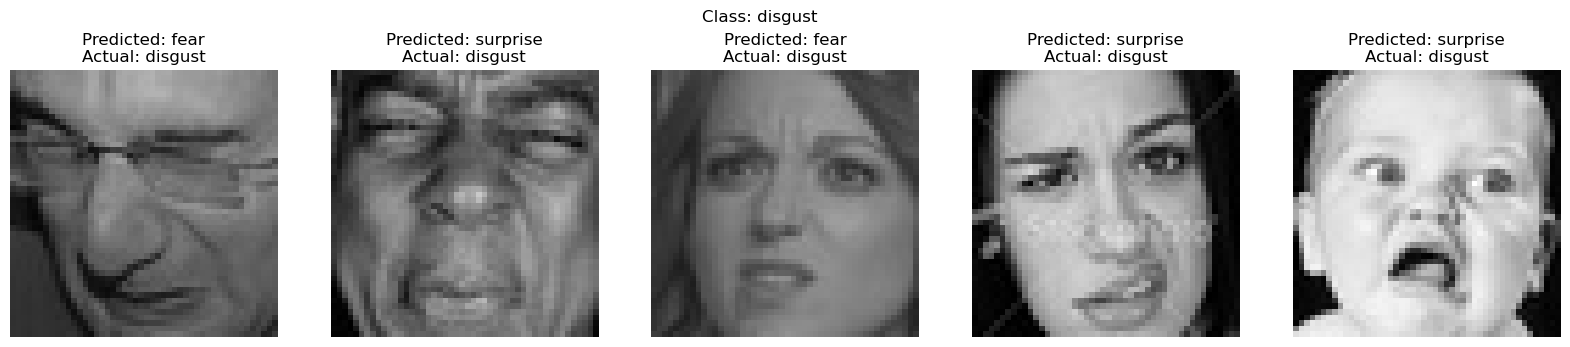

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: 10029.jpg - Predicted: surprise - Actual: fear - Prediction: [[7.6331953e-27 4.0211251e-18 4.4343328e-01 4.4258871e-11 2.5628602e-11
  5.5656672e-01 2.2560141e-28]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image: 10043.jpg - Predicted: fear - Actual: fear - Prediction: [[3.4874722e-25 9.3413737e-16 7.3405510e-01 2.6515275e-20 6.1096196e-19
  2.6594490e-01 3.4671058e-28]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image: 10044.jpg - Predicted: fear - Actual: fear - Prediction: [[4.6020172e-34 1.4825873e-12 9.9999976e-01 1.7667894e-23 1.5277357e-21
  1.9027044e-07 0.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: 1008.jpg - Predicted: fear - Actual: fear - Prediction: [[6.0763172e-32 7.4981119e-21 9.9994862e-01 2.0010728e-27 1.0305103e-23
  5.1340274e-05 0.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Image: 10099.jpg - Predicted: surprise - Actual: fear - Prediction: [[1.4739845e-13 2.1358751e-16 1.6618082e-03 2.5370782e-19 1.7683492

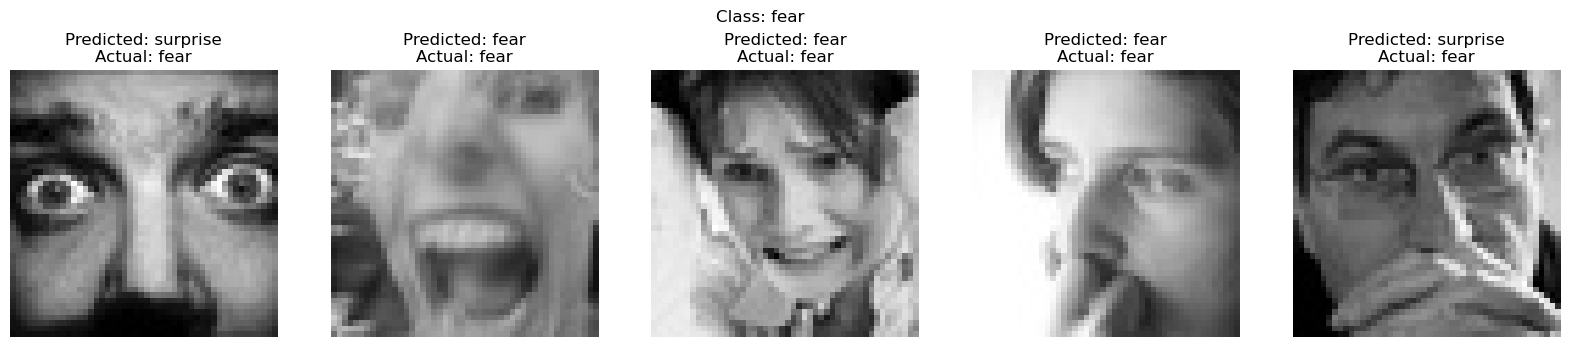

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image: 10019.jpg - Predicted: fear - Actual: happy - Prediction: [[1.6558104e-15 4.4634252e-09 9.9991500e-01 1.9268203e-08 4.2239981e-14
  8.4939973e-05 1.0910083e-18]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: 10023.jpg - Predicted: surprise - Actual: happy - Prediction: [[5.0843125e-30 3.7727599e-26 1.2366026e-12 5.4234841e-31 1.5523152e-29
  1.0000000e+00 0.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: 10074.jpg - Predicted: surprise - Actual: happy - Prediction: [[6.5595791e-25 6.9203111e-12 1.8664633e-01 1.0208895e-13 3.4198289e-12
  8.1335372e-01 2.0493209e-33]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: 10096.jpg - Predicted: fear - Actual: happy - Prediction: [[9.49725899e-27 1.04635886e-16 9.99986768e-01 8.06689778e-26
  6.86759918e-20 1.32246141e-05 0.00000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image: 10106.jpg - Predicted: fear - Actual: happy - Prediction: [[3.2094097e-10 1.4241935e-07 9.9992383e-01 2.6399595e

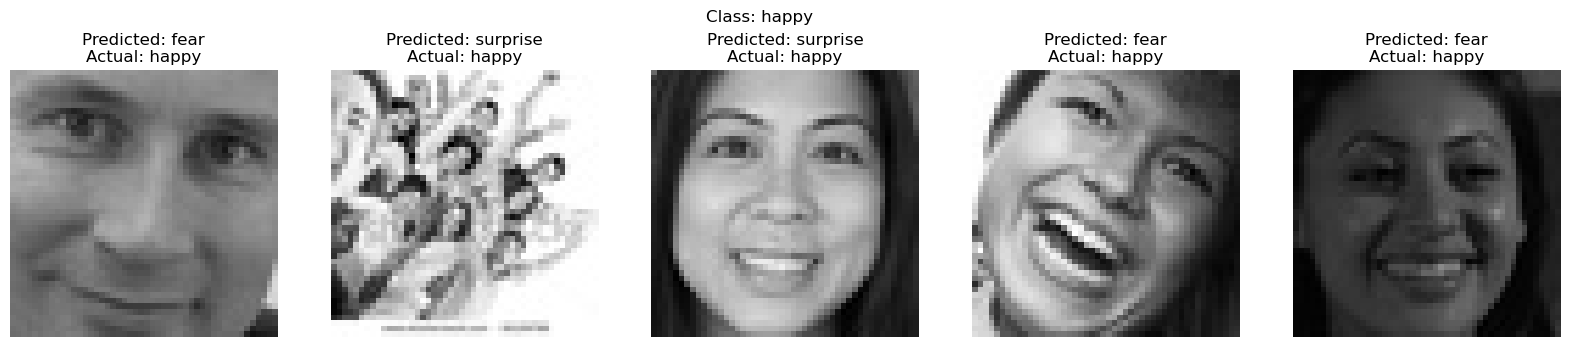

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Image: 10004.jpg - Predicted: fear - Actual: sad - Prediction: [[3.3032951e-21 2.2685029e-12 1.0000000e+00 4.3321093e-12 1.5865460e-15
  2.7106186e-12 8.1513521e-28]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: 1003.jpg - Predicted: fear - Actual: sad - Prediction: [[6.5407162e-28 1.9318128e-14 9.9097860e-01 9.7559913e-14 2.4442765e-18
  9.0214564e-03 2.1545454e-30]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image: 10031.jpg - Predicted: fear - Actual: sad - Prediction: [[1.8515691e-18 6.9190964e-12 9.9999940e-01 9.1497894e-12 1.7938265e-13
  5.4240832e-07 6.2559116e-21]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: 10073.jpg - Predicted: surprise - Actual: sad - Prediction: [[2.3751081e-18 2.0961482e-15 1.5621902e-03 1.3391923e-20 1.9002883e-13
  9.9843782e-01 8.3127774e-17]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Image: 10114.jpg - Predicted: fear - Actual: sad - Prediction: [[3.7113927e-34 1.0364106e-14 1.0000000e+00 3.9304621e-27 4.9283309e-32
  2.

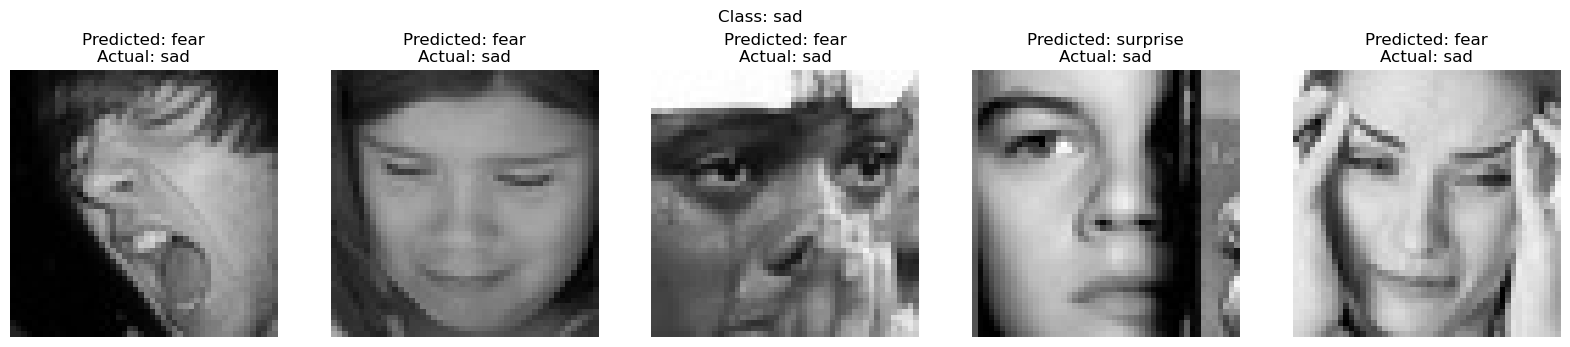

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Image: 10056.jpg - Predicted: surprise - Actual: surprise - Prediction: [[3.2299839e-28 1.8667658e-10 1.9431496e-01 6.3998815e-15 1.0306909e-12
  8.0568504e-01 1.8625129e-32]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: 10097.jpg - Predicted: fear - Actual: surprise - Prediction: [[4.6178436e-15 5.1376577e-07 9.9818343e-01 3.1065778e-11 7.6825464e-12
  1.8160717e-03 1.8636466e-19]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image: 10162.jpg - Predicted: fear - Actual: surprise - Prediction: [[6.8847723e-35 1.6348174e-17 9.9980623e-01 4.2094369e-23 1.1335415e-25
  1.9384020e-04 0.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Image: 10185.jpg - Predicted: fear - Actual: surprise - Prediction: [[1.0824079e-30 2.7782429e-15 9.9958283e-01 3.5606022e-24 1.9707425e-26
  4.1713275e-04 0.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: 10246.jpg - Predicted: fear - Actual: surprise - Prediction: [[2.6945765e-10 8.5178833e-04 9.4669336e-01 4.4495

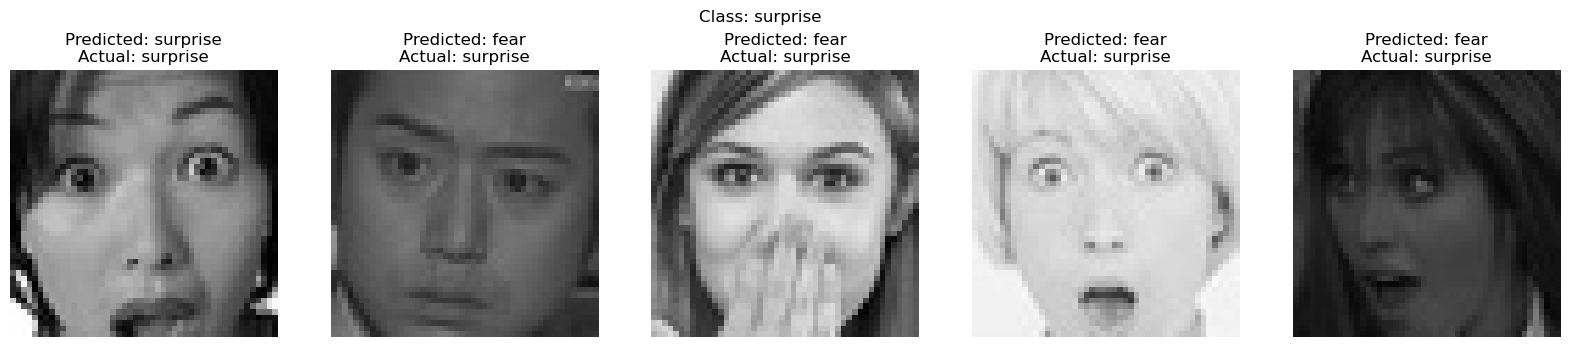

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: 10033.jpg - Predicted: fear - Actual: neutral - Prediction: [[5.69203465e-35 6.69787489e-22 9.99999285e-01 1.11653883e-21
  1.20051225e-26 6.57191038e-07 3.00116278e-35]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: 10048.jpg - Predicted: surprise - Actual: neutral - Prediction: [[2.6249835e-30 8.9364449e-15 8.0300234e-03 1.2052493e-21 2.8429368e-27
  9.9197000e-01 1.5312099e-37]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Image: 10068.jpg - Predicted: surprise - Actual: neutral - Prediction: [[1.9568071e-20 5.6876271e-11 3.5334907e-02 5.2137720e-17 6.3653889e-13
  9.6466511e-01 7.7690058e-31]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: 10117.jpg - Predicted: surprise - Actual: neutral - Prediction: [[2.2489539e-19 4.9749516e-09 4.9515599e-01 1.1036999e-14 9.4463909e-15
  5.0484407e-01 2.1718374e-24]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image: 10118.jpg - Predicted: fear - Actual: neutral - Prediction: [[6.5798740e-21 5.1874687e-09 9.1610271e

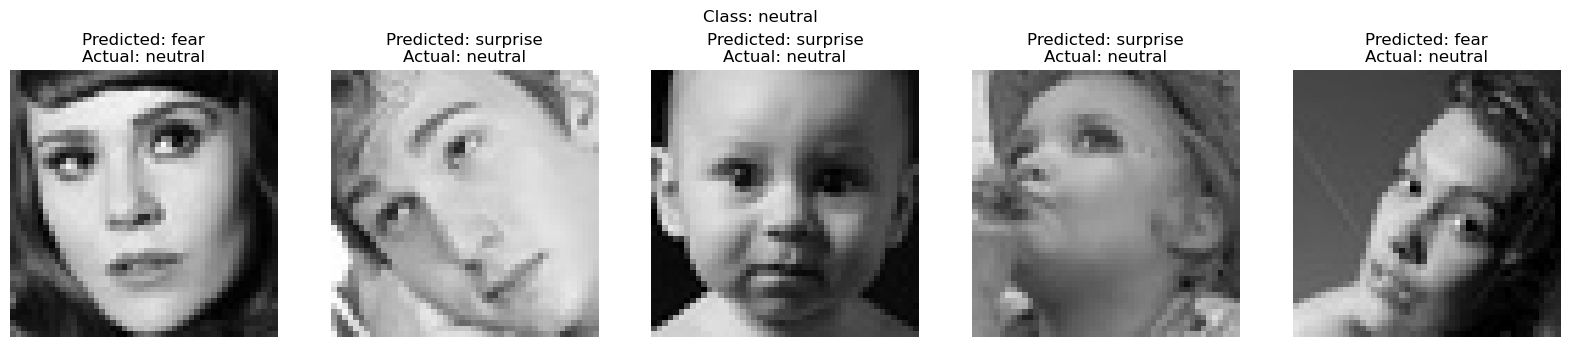

In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

# Path to my validation dataset
validation_dir = "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation"

# List of emotion classes
emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Function to preprocess and predict emotion for a single image
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def predict_emotion(image_path):
    image = load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    image = img_to_array(image)
    image = preprocess_image(image)
    prediction = model.predict(image)
    emotion_label = emotion_classes[np.argmax(prediction)]
    return emotion_label, prediction

# Display a few images from each class and their predictions
def display_and_predict_samples(class_name):
    class_path = os.path.join(validation_dir, class_name)
    images = os.listdir(class_path)[:5]  # Display and predict for first 5 images
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for img, ax in zip(images, axes):
        img_path = os.path.join(class_path, img)
        image = load_img(img_path, target_size=(48, 48))
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        predicted_emotion, prediction = predict_emotion(img_path)
        ax.set_title(f"Predicted: {predicted_emotion}\nActual: {class_name}")
        print(f"Image: {img} - Predicted: {predicted_emotion} - Actual: {class_name} - Prediction: {prediction}")
    plt.suptitle(f"Class: {class_name}")
    plt.show()

for class_name in emotion_classes:
    display_and_predict_samples(class_name)


In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of VGG16
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)  # 7 classes for emotions

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assuming you have train_images and train_labels loaded
# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(validation_images, validation_labels))

# Evaluate the model
val_loss, val_acc = model.evaluate(validation_images, validation_labels, verbose=2)
print(f"Validation accuracy: {val_acc}")


NameError: name 'train_images' is not defined

In [16]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelBinarizer

# Paths to the dataset
train_dir = "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/train"
validation_dir = "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation"

# List of emotion classes
emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Function to load images and labels
def load_dataset(dataset_dir):
    images = []
    labels = []
    for class_name in emotion_classes:
        class_path = os.path.join(dataset_dir, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            image = load_img(img_path, target_size=(48, 48), color_mode='grayscale')
            image = img_to_array(image)
            image = np.expand_dims(image, axis=-1)
            images.append(image)
            labels.append(class_name)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load training and validation data
train_images, train_labels = load_dataset(train_dir)
validation_images, validation_labels = load_dataset(validation_dir)

# Convert labels to one-hot encoding
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
validation_labels = lb.transform(validation_labels)

# Convert grayscale images to RGB
train_images = np.repeat(train_images, 3, axis=-1)
validation_images = np.repeat(validation_images, 3, axis=-1)

# Normalize the images
train_images = train_images / 255.0
validation_images = validation_images / 255.0

print(f"Training set: {train_images.shape[0]} samples, Validation set: {validation_images.shape[0]} samples")


Training set: 28821 samples, Validation set: 7066 samples


In [17]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of VGG16
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)  # 7 classes for emotions

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(validation_images, validation_labels))

# Evaluate the model
val_loss, val_acc = model.evaluate(validation_images, validation_labels, verbose=2)
print(f"Validation accuracy: {val_acc}")


ValueError: Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape (28821, 48, 48, 1, 3)

In [18]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelBinarizer

# Paths to the dataset
train_dir = "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/train"
validation_dir = "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation"

# List of emotion classes
emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Function to load images and labels
def load_dataset(dataset_dir):
    images = []
    labels = []
    for class_name in emotion_classes:
        class_path = os.path.join(dataset_dir, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            image = load_img(img_path, target_size=(48, 48), color_mode='grayscale')
            image = img_to_array(image)
            image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
            images.append(image)
            labels.append(class_name)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load training and validation data
train_images, train_labels = load_dataset(train_dir)
validation_images, validation_labels = load_dataset(validation_dir)

# Convert labels to one-hot encoding
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
validation_labels = lb.transform(validation_labels)

# Normalize the images
train_images = train_images / 255.0
validation_images = validation_images / 255.0

print(f"Training set: {train_images.shape[0]} samples, Validation set: {validation_images.shape[0]} samples")


Training set: 28821 samples, Validation set: 7066 samples


In [19]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of VGG16
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)  # 7 classes for emotions

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(validation_images, validation_labels))

# Evaluate the model
val_loss, val_acc = model.evaluate(validation_images, validation_labels, verbose=2)
print(f"Validation accuracy: {val_acc}")


Epoch 1/20


C:\Users\theop\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


901/901 ━━━━━━━━━━━━━━━━━━━━ 429s 473ms/step - accuracy: 0.2457 - loss: 1.8480 - val_accuracy: 0.3385 - val_loss: 1.6751
Epoch 2/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 445s 493ms/step - accuracy: 0.3162 - loss: 1.7053 - val_accuracy: 0.3504 - val_loss: 1.6465
Epoch 3/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 470s 521ms/step - accuracy: 0.3325 - loss: 1.6883 - val_accuracy: 0.3593 - val_loss: 1.6313
Epoch 4/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 457s 507ms/step - accuracy: 0.3259 - loss: 1.6750 - val_accuracy: 0.3680 - val_loss: 1.6190
Epoch 5/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 451s 500ms/step - accuracy: 0.3346 - loss: 1.6660 - val_accuracy: 0.3688 - val_loss: 1.6155
Epoch 6/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 452s 502ms/step - accuracy: 0.3431 - loss: 1.6600 - val_accuracy: 0.3789 - val_loss: 1.5962
Epoch 7/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 443s 491ms/step - accuracy: 0.3468 - loss: 1.6425 - val_accuracy: 0.3774 - val_loss: 1.5945
Epoch 8/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 442s 491ms/step - accuracy: 0.3517 - loss: 1.63

In [20]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of VGG16
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(7, activation='softmax')(x)  # 7 classes for emotions

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the first 15 layers of VGG16
for layer in base_model.layers[:15]:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=50,  # Increase the number of epochs
                    validation_data=(validation_images, validation_labels))

# Evaluate the model
val_loss, val_acc = model.evaluate(validation_images, validation_labels, verbose=2)
print(f"Validation accuracy: {val_acc}")


Epoch 1/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 627s 692ms/step - accuracy: 0.2678 - loss: 1.7959 - val_accuracy: 0.4151 - val_loss: 1.5207
Epoch 2/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 617s 685ms/step - accuracy: 0.3729 - loss: 1.6107 - val_accuracy: 0.4643 - val_loss: 1.4045
Epoch 3/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 620s 688ms/step - accuracy: 0.4126 - loss: 1.5378 - val_accuracy: 0.4885 - val_loss: 1.3566
Epoch 4/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 629s 698ms/step - accuracy: 0.4325 - loss: 1.4898 - val_accuracy: 0.4987 - val_loss: 1.3226
Epoch 5/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 643s 713ms/step - accuracy: 0.4433 - loss: 1.4633 - val_accuracy: 0.4983 - val_loss: 1.3275
Epoch 6/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 642s 712ms/step - accuracy: 0.4550 - loss: 1.4298 - val_accuracy: 0.5065 - val_loss: 1.2926
Epoch 7/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 635s 705ms/step - accuracy: 0.4696 - loss: 1.4134 - val_accuracy: 0.5108 - val_loss: 1.2819
Epoch 8/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 638s 708ms/step - accuracy: 0.4675 -

In [61]:
# Save the second model
model.save('emotion_model_second.h5')
print("Second emotion model saved successfully")


Second emotion model saved successfully


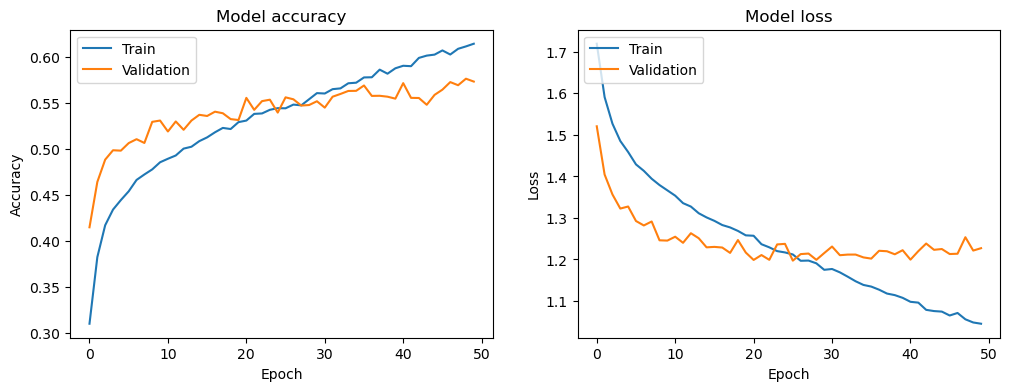

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


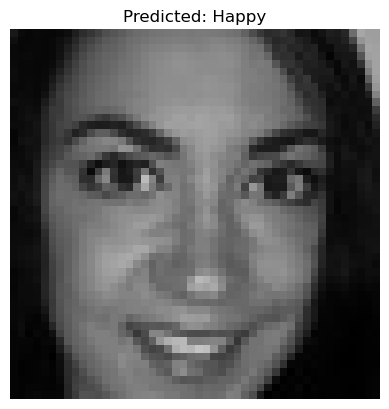

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


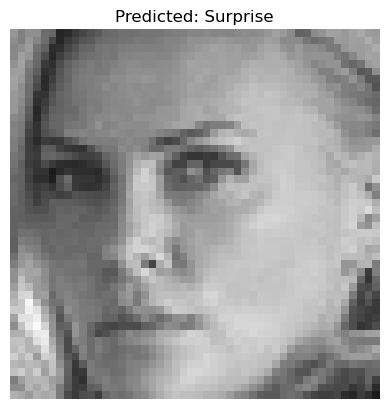

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


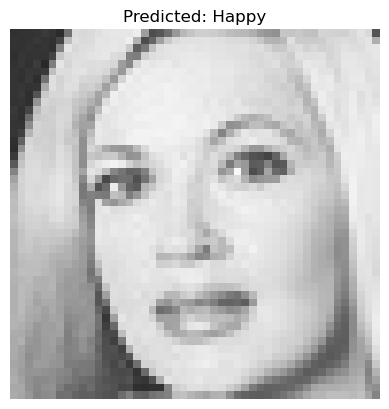

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


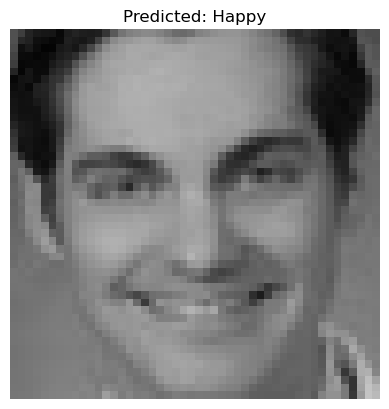

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


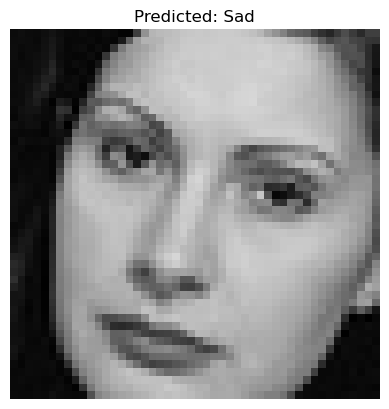

In [24]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the path to my validation images
validation_images_dir = 'C:\\Users\\theop\\Downloads\\Face_expression_recognition_dataset\\images\\validation'

# Function to display and predict an image
def display_and_predict(img_path):
    image = load_img(img_path, target_size=(48, 48), color_mode='grayscale')
    image = img_to_array(image)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image

    prediction = model.predict(image)
    predicted_emotion = emotions[np.argmax(prediction)]

    plt.imshow(image[0], cmap='gray')
    plt.title(f"Predicted: {predicted_emotion}")
    plt.axis('off')
    plt.show()

# Test of the model on validation images
emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
validation_images = []

# Collection of all images from the validation directory
for emotion in emotion_classes:
    emotion_dir = os.path.join(validation_images_dir, emotion)
    if os.path.exists(emotion_dir):
        for img in os.listdir(emotion_dir):
            validation_images.append(os.path.join(emotion_dir, img))

# Randomly selection of a few images to display and predict
for _ in range(5):
    img_path = random.choice(validation_images)
    display_and_predict(img_path)


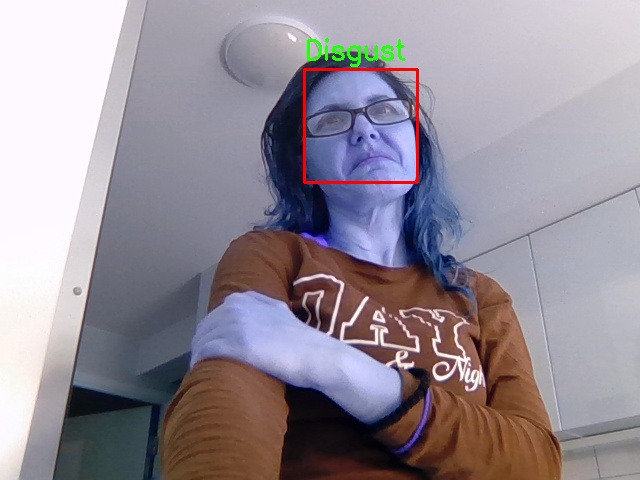

Stopped.


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [25]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    cv2.destroyAllWindows()
    print("Resources released.")


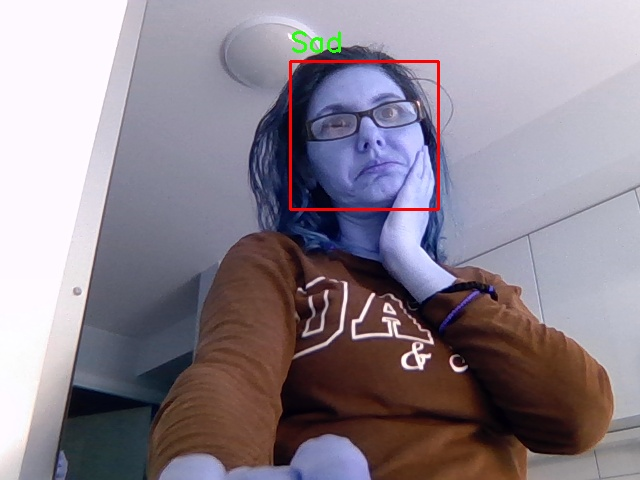

Stopped.
Resources released.


In [27]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


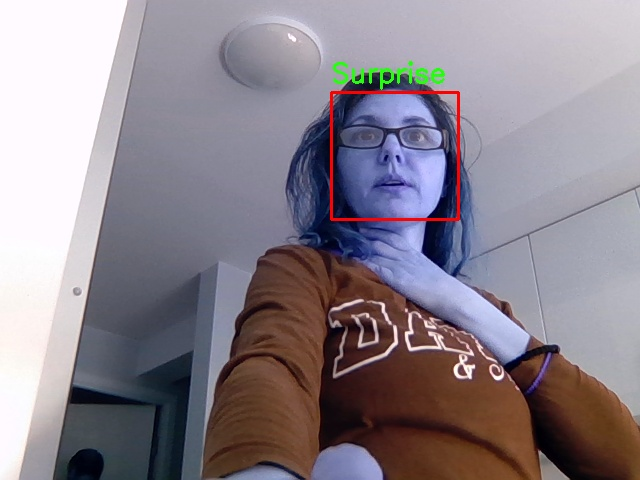

Stopped.
Resources released.


In [28]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


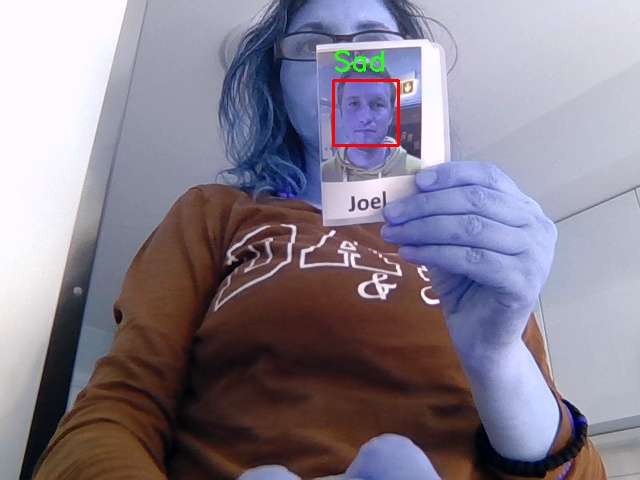

Stopped.
Resources released.


In [29]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


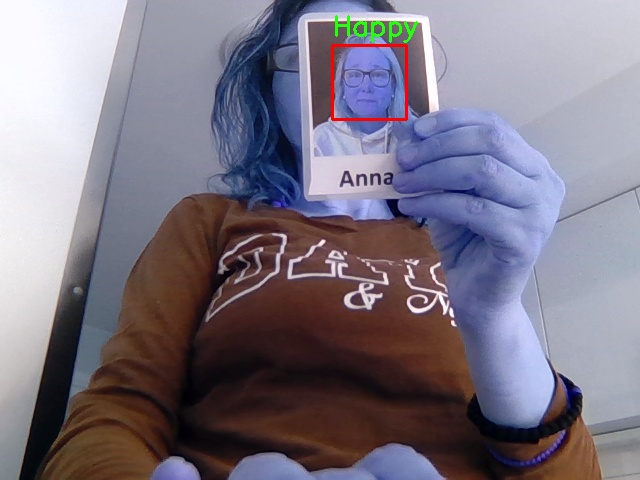

Stopped.
Resources released.


In [30]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


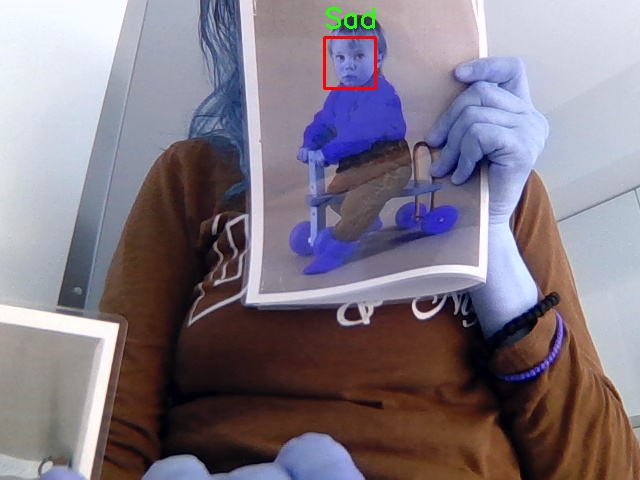

Stopped.
Resources released.


In [35]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


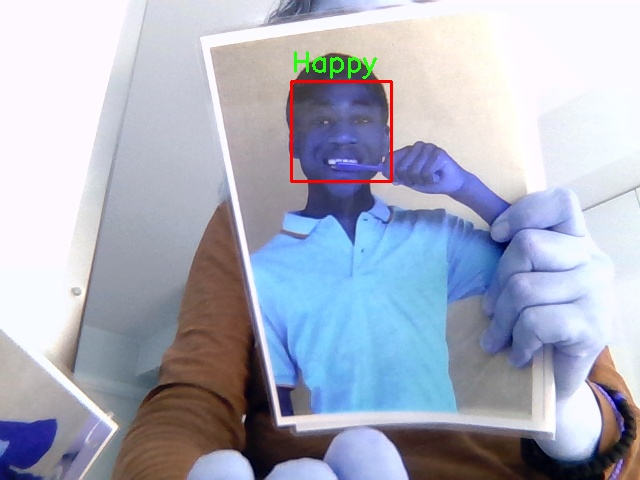

Stopped.
Resources released.


In [37]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


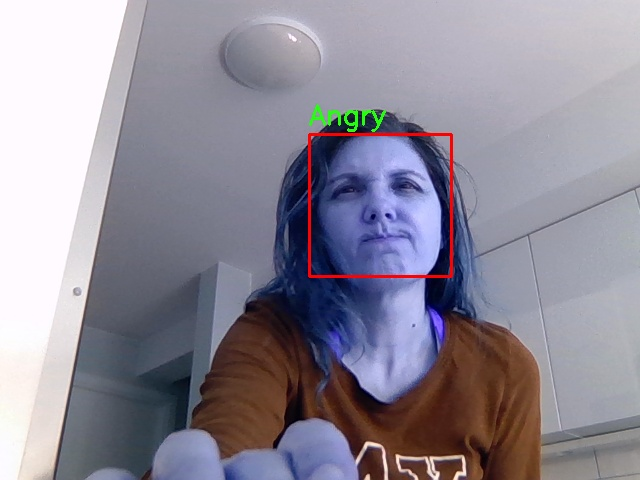

Stopped.
Resources released.


In [39]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


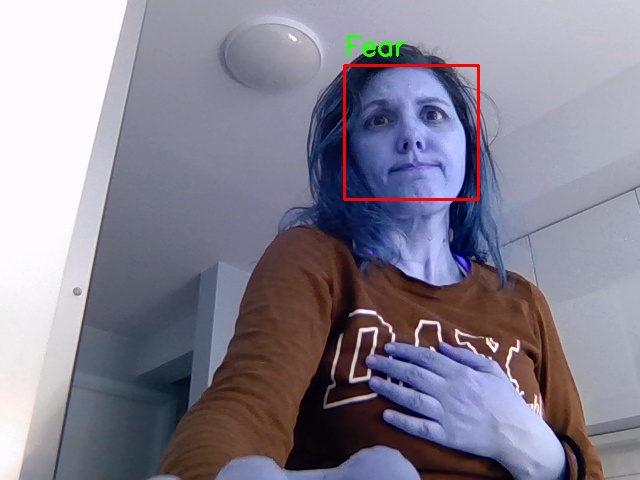

Stopped.
Resources released.


In [41]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


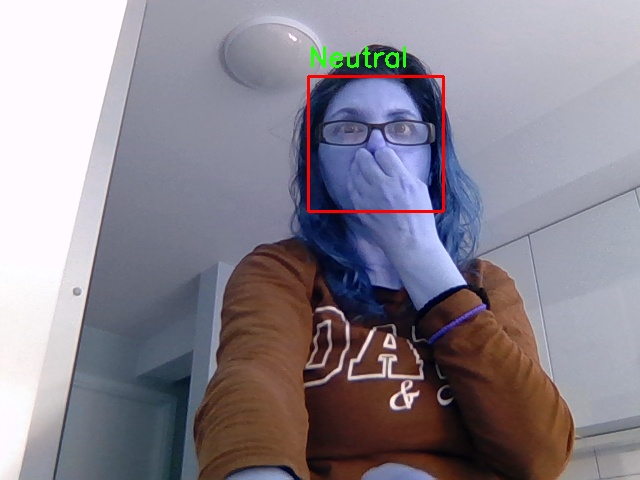

Stopped.
Resources released.


In [42]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


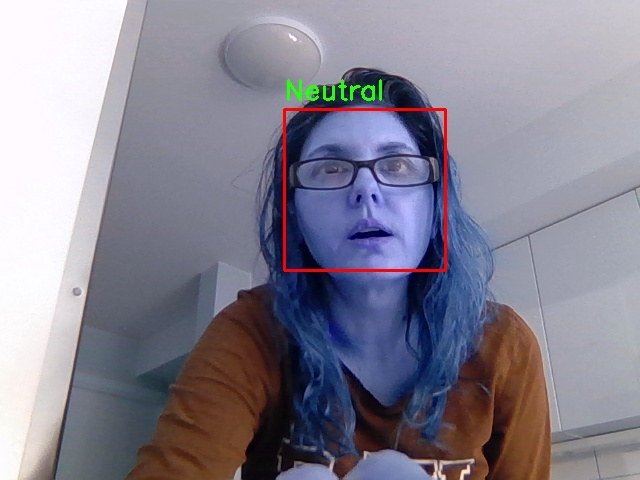

Stopped.
Resources released.


In [45]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


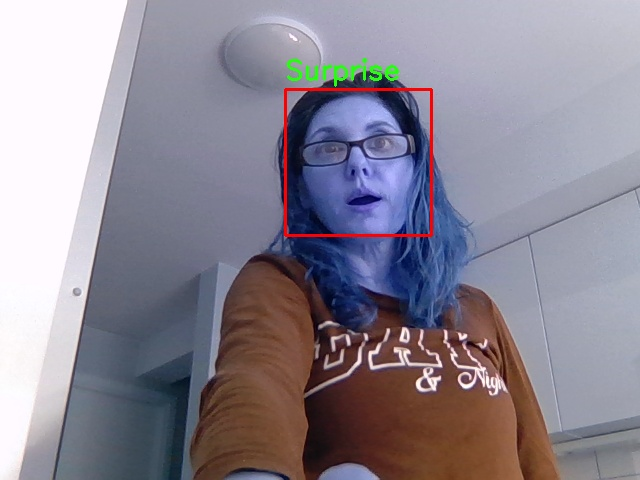

Stopped.
Resources released.


In [46]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


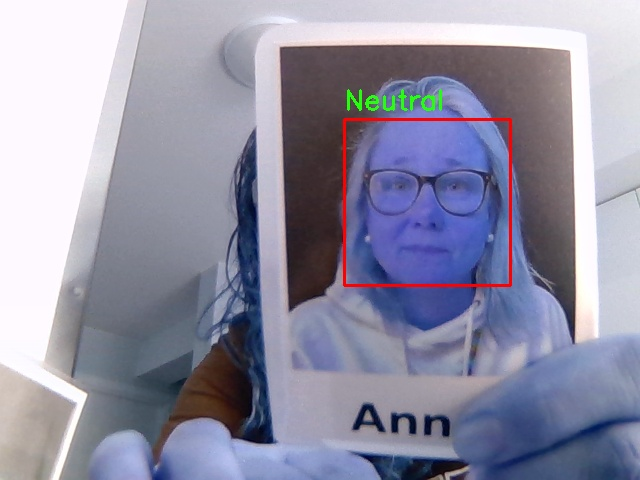

Stopped.
Resources released.


In [47]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face = preprocess_image(face)
            prediction = model.predict(face)
            emotion_label = emotions[np.argmax(prediction)]

            # Draw rectangle around face and put the emotion label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


In [50]:
pip install tensorflow keras opencv-python


In [51]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import cv2
import numpy as np

# Load pre-trained MobileNetV2 model + higher level layers
base_model_gender = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
x = base_model_gender.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions_gender = Dense(1, activation='sigmoid')(x)  # Binary classification for gender

model_gender = Model(inputs=base_model_gender.input, outputs=predictions_gender)

# Freeze the layers of MobileNetV2
for layer in base_model_gender.layers:
    layer.trainable = False

# Compile the model
model_gender.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




def preprocess_gender_image(image):
    image = cv2.resize(image, (96, 96))
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    return image


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


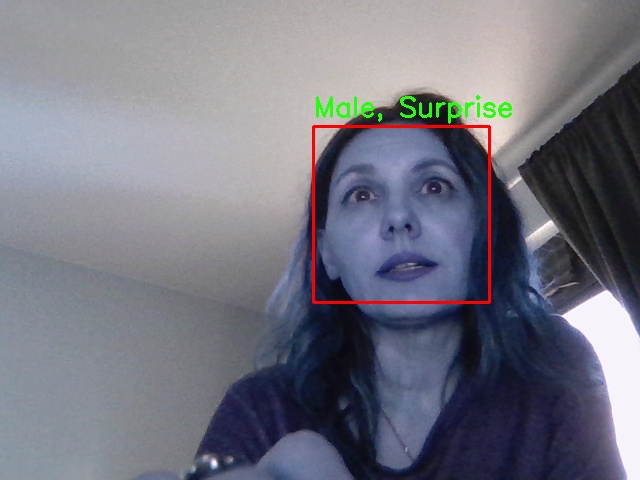

Stopped.
Resources released.


In [52]:
import cv2
from IPython.display import display, Image, clear_output

# Preprocess function to convert grayscale images to RGB
def preprocess_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray_frame[y:y + h, x:x + w]
            face_rgb = cv2.cvtColor(face, cv2.COLOR_GRAY2RGB)

            # Predict emotion
            face_emotion = preprocess_image(face)
            prediction_emotion = model.predict(face_emotion)
            emotion_label = emotions[np.argmax(prediction_emotion)]

            # Predict gender
            face_gender = preprocess_gender_image(face_rgb)
            prediction_gender = model_gender.predict(face_gender)
            gender_label = 'Male' if prediction_gender < 0.5 else 'Female'

            # Draw rectangle around face and put the emotion and gender labels
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            label = f"{gender_label}, {emotion_label}"
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


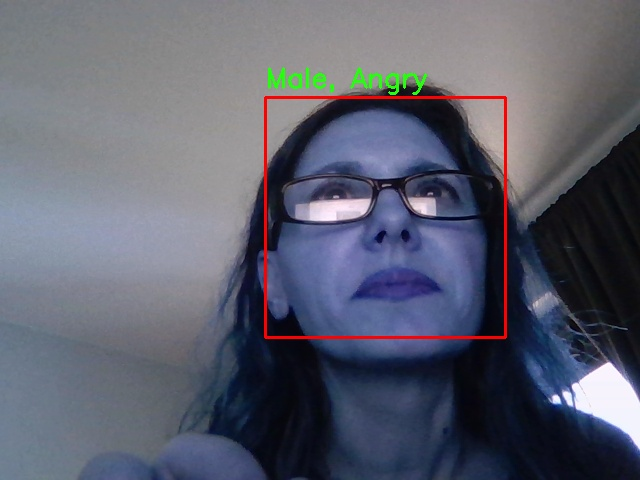

Stopped.
Resources released.


In [55]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np

# Preprocess function for emotion model
def preprocess_emotion_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Preprocess function for gender model
def preprocess_gender_image(image):
    image = cv2.resize(image, (96, 96))
    image = np.expand_dims(image, axis=0)
    image = image / 255.0  # Normalize the image
    return image

# Define a dictionary to map label indices to emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face_gray = gray_frame[y:y + h, x:x + w]
            face_rgb = cv2.cvtColor(face_gray, cv2.COLOR_GRAY2RGB)

            # Predict emotion
            face_emotion = preprocess_emotion_image(face_gray)
            prediction_emotion = model.predict(face_emotion)
            emotion_label = emotions[np.argmax(prediction_emotion)]

            # Predict gender
            face_gender = preprocess_gender_image(face_rgb)
            prediction_gender = model_gender.predict(face_gender)
            gender_label = 'Male' if prediction_gender < 0.5 else 'Female'

            # Draw rectangle around face and put the emotion and gender labels
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            label = f"{gender_label}, {emotion_label}"
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


In [63]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
import numpy as np
import os

# Load pre-trained MobileNetV2 model + higher level layers for gender classification
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Add custom layers on top of MobileNetV2
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Assuming binary gender classification

gender_model = Model(inputs=base_model.input, outputs=predictions)
gender_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [65]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to my dataset
train_data_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/train'
validation_data_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation'
images_data_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/images'

# Create a data generator for training and validation with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create iterators for training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

# Create a similar iterator for the images set
images_generator = validation_datagen.flow_from_directory(
    images_data_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Do not shuffle images data
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Found 35887 images belonging to 2 classes.


In [77]:
pip install opencv-python-headless tqdm 


Note: you may need to restart the kernel to use updated packages.


In [157]:
import os
import shutil
from tqdm import tqdm
import cv2

# Define paths
base_dir = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
gender_train_dir = os.path.join(base_dir, 'train_gender')
gender_validation_dir = os.path.join(base_dir, 'validation_gender')

# Create directories 
os.makedirs(gender_train_dir, exist_ok=True)
os.makedirs(gender_validation_dir, exist_ok=True)
for category in ['male', 'female']:
    os.makedirs(os.path.join(gender_train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(gender_validation_dir, category), exist_ok=True)

# Load pre-trained gender model
prototxt_path = "C:/Users/theop/Downloads/Face_expression_recognition_dataset/deploy.prototxt"
model_path = "C:/Users/theop/Downloads/Face_expression_recognition_dataset/res10_300x300_ssd_iter_140000_fp16.caffemodel"
gender_net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

def classify_and_move_images(src_dir, dst_dir):
    for root, _, files in os.walk(src_dir):
        for file in tqdm(files):
            if file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(root, file)
                try:
                    img = cv2.imread(img_path)
                    blob = cv2.dnn.blobFromImage(img, 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
                    gender_net.setInput(blob)
                    gender_preds = gender_net.forward()
                    gender = gender_preds[0].argmax()
                    gender_label = 'male' if gender == 0 else 'female'
                    dst_path = os.path.join(dst_dir, gender_label, file)
                    shutil.copy(img_path, dst_path)
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")

# Classify and move training images
print("Processing training images...")
classify_and_move_images(train_dir, gender_train_dir)

# Classify and move validation images
print("Processing validation images...")
classify_and_move_images(validation_dir, gender_validation_dir)


Processing training images...


0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████| 3205/3205 [02:21<00:00, 22.73it/s]


Processing validation images...


0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████| 797/797 [00:31<00:00, 25.39it/s]


In [159]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define paths
gender_train_data_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/train_gender'
gender_validation_data_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation_gender'

# Create ImageDataGenerators
gender_train_datagen = ImageDataGenerator(rescale=1./255)
gender_validation_datagen = ImageDataGenerator(rescale=1./255)

# Create iterators for gender training and validation sets
gender_train_generator = gender_train_datagen.flow_from_directory(
    gender_train_data_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

gender_validation_generator = gender_validation_datagen.flow_from_directory(
    gender_validation_data_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)  # 2 classes for gender

gender_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the first 15 layers of VGG16
for layer in base_model.layers[:15]:
    layer.trainable = False

# Compile the model
gender_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the gender classifier
gender_history = gender_model.fit(
    gender_train_generator,
    epochs=20,  # You can adjust the number of epochs
    validation_data=gender_validation_generator
)

# Save the gender classifier
gender_model.save('gender_model.h5')
print("Gender model saved successfully")


Found 45641 images belonging to 2 classes.
Found 11149 images belonging to 2 classes.
Epoch 1/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1120s 781ms/step - accuracy: 0.6207 - loss: 0.6622 - val_accuracy: 0.6338 - val_loss: 0.6307
Epoch 2/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1101s 771ms/step - accuracy: 0.6311 - loss: 0.6367 - val_accuracy: 0.6338 - val_loss: 0.6227
Epoch 3/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1095s 767ms/step - accuracy: 0.6335 - loss: 0.6237 - val_accuracy: 0.6338 - val_loss: 0.6267
Epoch 4/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1091s 765ms/step - accuracy: 0.6316 - loss: 0.6218 - val_accuracy: 0.6338 - val_loss: 0.6178
Epoch 5/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1093s 766ms/step - accuracy: 0.6310 - loss: 0.6153 - val_accuracy: 0.6338 - val_loss: 0.6170
Epoch 6/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1094s 766ms/step - accuracy: 0.6316 - loss: 0.6113 - val_accuracy: 0.6338 - val_loss: 0.6158
Epoch 7/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1093s 766ms/step - accuracy: 0.6281 - loss: 0.6081 - val_accur

Gender model saved successfully


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt

# Load pre-trained emotion and gender models
emotion_model = load_model('emotion_model_first.h5') 
gender_model = load_model('gender_model.h5')

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Define gender labels
gender_labels = ['Male', 'Female']

# Load the image
image_path = "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/disgust/35376.jpg"
image = cv2.imread(image_path)

# Preprocess the face for emotion prediction
face_gray = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (48, 48))
face_gray = cv2.cvtColor(face_gray, cv2.COLOR_GRAY2RGB)  # Convert back to RGB
face_gray = face_gray / 255.0
face_gray = np.expand_dims(face_gray, axis=0)

# Preprocess the face for gender prediction
face_color = cv2.resize(image, (48, 48))
face_color = face_color / 255.0
face_color = np.expand_dims(face_color, axis=0)

# Predict emotion
emotion_preds = emotion_model.predict(face_gray)
emotion = np.argmax(emotion_preds)
emotion_text = emotion_labels[emotion]

# Predict gender
gender_preds = gender_model.predict(face_color)
gender = np.argmax(gender_preds)
gender_text = gender_labels[gender]

# Display predictions
print(f'Predicted emotion: {emotion_text}')
print(f'Predicted gender: {gender_text}')

# Display the resulting image within the notebook
output_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(output_image)
plt.axis('off')
plt.show()


In [160]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import os

# Load pre-trained emotion and gender models
emotion_model = load_model('emotion_model_first.h5') 
gender_model = load_model('gender_model.h5')

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Define gender labels
gender_labels = ['Male', 'Female']

# Function to predict emotion and gender for an image
def predict_emotion_and_gender(image_path):
    if not os.path.exists(image_path):
        print(f"Error: Image at path {image_path} does not exist.")
        return None, None, None

    # Load the image
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to load image at path {image_path}")
        return None, None, None

    # Preprocess the face for emotion prediction
    face_gray = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (48, 48))
    face_gray = cv2.cvtColor(face_gray, cv2.COLOR_GRAY2RGB)  # Convert back to RGB
    face_gray = face_gray / 255.0
    face_gray = np.expand_dims(face_gray, axis=0)

    # Preprocess the face for gender prediction
    face_color = cv2.resize(image, (48, 48))
    face_color = face_color / 255.0
    face_color = np.expand_dims(face_color, axis=0)

    # Predict emotion
    print(f"face_gray shape: {face_gray.shape}")
    emotion_preds = emotion_model.predict(face_gray)
    print(f"emotion_preds: {emotion_preds}")
    emotion = np.argmax(emotion_preds)
    emotion_text = emotion_labels[emotion]

    # Predict gender
    print(f"face_color shape: {face_color.shape}")
    gender_preds = gender_model.predict(face_color)
    print(f"gender_preds: {gender_preds}")
    gender = np.argmax(gender_preds)
    gender_text = gender_labels[gender]

    return emotion_text, gender_text, image

# Paths to some sample images 
sample_image_paths = [
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/disgust/807.jpg",
    # Ensure these paths exist and correct them
    # "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/happy/1001.jpg",
    # "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/2001.jpg"
]

# Predict and display results for each sample image
for image_path in sample_image_paths:
    emotion_text, gender_text, image = predict_emotion_and_gender(image_path)
    if image is not None:
        print(f'Image: {image_path}')
        print(f'Predicted emotion: {emotion_text}')
        print(f'Predicted gender: {gender_text}')

        # Display the resulting image within the notebook
        output_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(output_image)
        plt.title(f'Emotion: {emotion_text}, Gender: {gender_text}')
        plt.axis('off')
        plt.show()


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'emotion_model_first.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [161]:
# paths of sample images
sample_image_paths = [
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/disgust/7068.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/happy/9865.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/977.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/angry/9331.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/surprise/9806.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/fear/9101.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9874.jpg"
]

# Function to predict and display results for each image
def test_multiple_images(image_paths):
    for image_path in image_paths:
        emotion_text, gender_text, image = predict_emotion_and_gender(image_path)
        if image is not None:
            print(f'Image: {image_path}')
            print(f'Predicted emotion: {emotion_text}')
            print(f'Predicted gender: {gender_text}')

            # Display the resulting image within the notebook
            output_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(output_image)
            plt.title(f'Emotion: {emotion_text}, Gender: {gender_text}')
            plt.axis('off')
            plt.show()

# Test the models on multiple images
test_multiple_images(sample_image_paths)


error: OpenCV(4.9.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0x59191d0d::Set<3,4,-1>,struct cv::impl::A0x59191d0d::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [113]:
# Load emotion model
emotion_model_path = 'emotion_model_first.h5'  # or 'emotion_model_second.h5' based on your model
emotion_model = tf.keras.models.load_model(emotion_model_path)

# Load gender model
gender_model_path = 'gender_model.h5'
gender_model = tf.keras.models.load_model(gender_model_path)

# Print summaries of the models
print("Emotion Model Summary:")
emotion_model.summary()

print("\nGender Model Summary:")
gender_model.summary()


Emotion Model Summary:


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,781,257 (56.39 MB)

 Trainable params: 14,781,255 (56.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)


Gender Model Summary:


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,780,612 (56.38 MB)

 Trainable params: 14,780,610 (56.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Define the validation data paths
emotion_validation_data_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation'
gender_validation_data_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation_gender'

# Data augmentation for validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create iterators for validation sets
emotion_validation_generator = validation_datagen.flow_from_directory(
    emotion_validation_data_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

gender_validation_generator = validation_datagen.flow_from_directory(
    gender_validation_data_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate emotion model
emotion_val_loss, emotion_val_acc = emotion_model.evaluate(emotion_validation_generator)
print(f"Emotion Model - Validation Accuracy: {emotion_val_acc}, Validation Loss: {emotion_val_loss}")

# Evaluate gender model
gender_val_loss, gender_val_acc = gender_model.evaluate(gender_validation_generator)
print(f"Gender Model - Validation Accuracy: {gender_val_acc}, Validation Loss: {gender_val_loss}")


In [114]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the validation data paths
emotion_validation_data_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation'
gender_validation_data_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation_gender'

# Data augmentation for validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create iterators for validation sets
emotion_validation_generator = validation_datagen.flow_from_directory(
    emotion_validation_data_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

gender_validation_generator = validation_datagen.flow_from_directory(
    gender_validation_data_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate emotion model
emotion_val_loss, emotion_val_acc = emotion_model.evaluate(emotion_validation_generator)
print(f"Emotion Model - Validation Accuracy: {emotion_val_acc}, Validation Loss: {emotion_val_loss}")

# Evaluate gender model
gender_val_loss, gender_val_acc = gender_model.evaluate(gender_validation_generator)
print(f"Gender Model - Validation Accuracy: {gender_val_acc}, Validation Loss: {gender_val_loss}")


Found 7066 images belonging to 7 classes.
Found 7066 images belonging to 2 classes.
221/221 ━━━━━━━━━━━━━━━━━━━━ 108s 483ms/step - accuracy: 0.5703 - loss: 1.2341
Emotion Model - Validation Accuracy: 0.5733088254928589, Validation Loss: 1.2270458936691284
221/221 ━━━━━━━━━━━━━━━━━━━━ 81s 361ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Gender Model - Validation Accuracy: 1.0, Validation Loss: 0.0


In [117]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the training data paths for gender
gender_train_data_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/train_gender'

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255)

# Create iterator for training set
gender_train_generator = train_datagen.flow_from_directory(
    gender_train_data_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

print("Gender Training Data Distribution:")
for class_label, count in zip(gender_train_generator.class_indices, np.bincount(gender_train_generator.classes)):
    print(f"{class_label}: {count}")


Found 28821 images belonging to 2 classes.
Gender Training Data Distribution:
female: 28821


In [118]:
import os
import shutil
from tqdm import tqdm
import cv2

# Define paths
base_dir = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
gender_train_dir = os.path.join(base_dir, 'train_gender')
gender_validation_dir = os.path.join(base_dir, 'validation_gender')

# Create directories 
os.makedirs(gender_train_dir, exist_ok=True)
os.makedirs(gender_validation_dir, exist_ok=True)
for category in ['male', 'female']:
    os.makedirs(os.path.join(gender_train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(gender_validation_dir, category), exist_ok=True)

# Load pre-trained gender model
prototxt_path = "C:/Users/theop/Downloads/deploy.prototxt"
model_path = "C:/Users/theop/Downloads/res10_300x300_ssd_iter_140000_fp16.caffemodel"
gender_net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

def classify_and_move_images(src_dir, dst_dir):
    for root, _, files in os.walk(src_dir):
        for file in tqdm(files):
            if file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(root, file)
                try:
                    img = cv2.imread(img_path)
                    blob = cv2.dnn.blobFromImage(img, 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
                    gender_net.setInput(blob)
                    gender_preds = gender_net.forward()
                    gender = gender_preds[0].argmax()
                    gender_label = 'male' if gender == 0 else 'female'
                    dst_path = os.path.join(dst_dir, gender_label, file)
                    shutil.copy(img_path, dst_path)
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")

# Classify and move training images
print("Processing training images...")
classify_and_move_images(train_dir, gender_train_dir)

# Classify and move validation images
print("Processing validation images...")
classify_and_move_images(validation_dir, gender_validation_dir)


Processing training images...


0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████| 3205/3205 [02:02<00:00, 26.08it/s]


Processing validation images...


0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████| 797/797 [00:30<00:00, 26.00it/s]


In [119]:
import os

# Define paths
gender_train_dir = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/train_gender'
gender_validation_dir = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation_gender'

def check_distribution(directory):
    categories = ['male', 'female']
    distribution = {category: len(os.listdir(os.path.join(directory, category))) for category in categories}
    return distribution

# Check the distribution in training and validation directories
train_distribution = check_distribution(gender_train_dir)
validation_distribution = check_distribution(gender_validation_dir)

print("Gender Training Data Distribution:", train_distribution)
print("Gender Validation Data Distribution:", validation_distribution)


Gender Training Data Distribution: {'male': 0, 'female': 28821}
Gender Validation Data Distribution: {'male': 0, 'female': 7066}


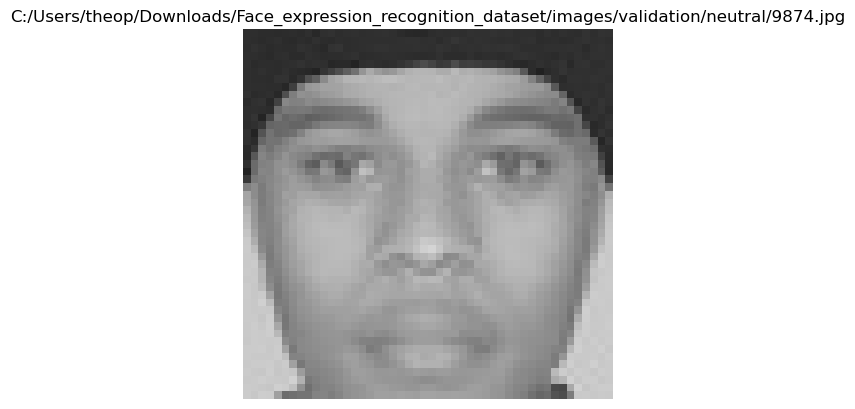

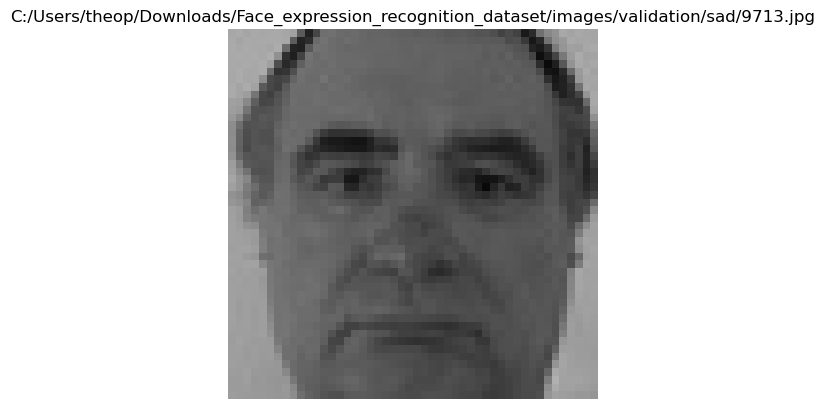

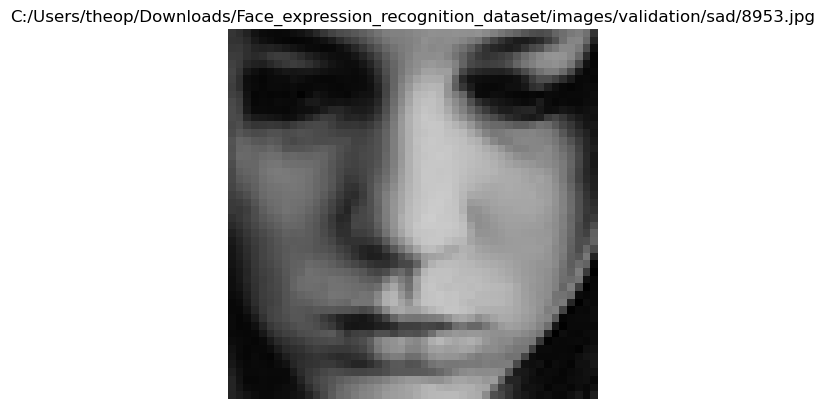

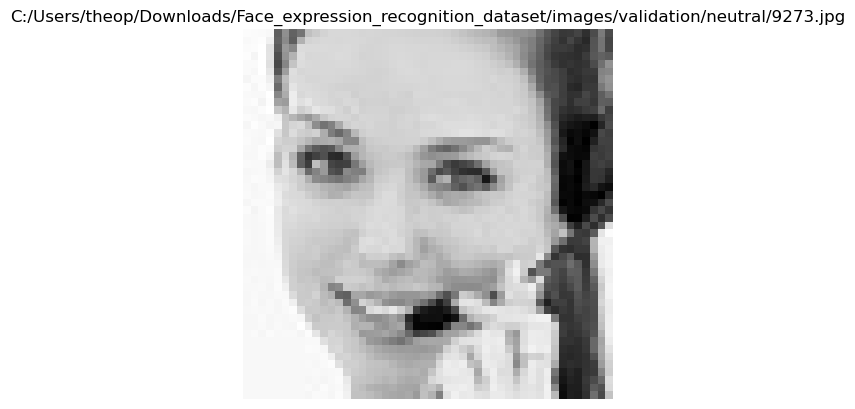

In [121]:
import cv2
import matplotlib.pyplot as plt

# Paths to a few known male and female images
sample_images = {
    "male": [
        "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9874.jpg",
        "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/9713.jpg"
    ],
    "female": [
        "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/8953.jpg",
        "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9273.jpg"
    ]
}

def display_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at path {image_path}")
        return
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(image_path)
    plt.axis('off')
    plt.show()

# Display sample images
for gender, paths in sample_images.items():
    for path in paths:
        display_image(path)


In [149]:
import cv2
import numpy as np

# Paths to a few known male and female images
sample_images = {
    "male": [
        "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9874.jpg",
        "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/9713.jpg"
    ],
    "female": [
        "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/8953.jpg",
        "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9273.jpg"
    ]
}

prototxt_path = "C:/Users/theop/Downloads/Face_expression_recognition_dataset/deploy.prototxt"
model_path = "C:/Users/theop/Downloads/Face_expression_recognition_dataset/res10_300x300_ssd_iter_140000_fp16.caffemodel"
gender_net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

def classify_gender(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Unable to load image at path {image_path}")
            return
        blob = cv2.dnn.blobFromImage(img, 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        gender_net.setInput(blob)
        gender_preds = gender_net.forward()
        gender_probs = gender_preds[0]
        gender = gender_probs.argmax()
        gender_label = 'male' if gender == 0 else 'female'
        print(f"Image: {image_path}, Predicted gender: {gender_label}, Probabilities: {gender_probs}")
    except Exception as e:
        print(f"Error processing {image_path}: {e}")

# Classify sample images and inspect intermediate outputs
for gender, paths in sample_images.items():
    for path in paths:
        classify_gender(path)


Image: C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9874.jpg, Predicted gender: female, Probabilities: [[[0.         1.         0.9609165  ... 2.6630163  2.5803473  3.687437  ]
  [0.         1.         0.9580443  ... 2.665044   3.655518   3.6946924 ]
  [0.         1.         0.95772666 ... 0.03562477 0.97080684 1.0188334 ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]]
Image: C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/9713.jpg, Predicted gender: female, Probabilities: [[[0.         1.         0.9796109  ... 0.01715821 0.9253297  1.0837803 ]
  [0.         1.         0.97188896 ... 2.6462512  2.5591564  3.770924  ]
  [0.         1.         0.9697878  ... 2.6457384  3.6145656  3.7705252 ]
  ...
  [0.         0.         0.       

In [152]:
import cv2
import numpy as np

# Paths to a few known male and female images
sample_images = {
    "male": [
        "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9874.jpg",
        "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/9713.jpg"
    ],
    "female": [
        "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/8953.jpg",
        "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9273.jpg"
    ]
}

# Load pre-trained gender model
prototxt_path = "C:/Users/theop/Downloads/deploy.prototxt"
model_path = "C:/Users/theop/Downloads/res10_300x300_ssd_iter_140000_fp16.caffemodel"
gender_net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

def classify_gender_simple(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Unable to load image at path {image_path}")
            return
        blob = cv2.dnn.blobFromImage(img, 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        gender_net.setInput(blob)
        gender_preds = gender_net.forward()
        gender_probs = gender_preds[0]
        gender = gender_probs.argmax()
        gender_label = 'male' if gender == 0 else 'female'
        print(f"Image: {image_path}, Predicted gender: {gender_label}, Probabilities: {gender_probs}")
    except Exception as e:
        print(f"Error processing {image_path}: {e}")

# Classify sample images and inspect intermediate outputs
for gender, paths in sample_images.items():
    for path in paths:
        classify_gender_simple(path)


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\caffe\caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "C:/Users/theop/Downloads/deploy.prototxt" in function 'cv::dnn::ReadProtoFromTextFile'


In [124]:
import os
import shutil
from tqdm import tqdm
import cv2

# Define paths
base_dir = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
gender_train_dir = os.path.join(base_dir, 'train_gender')
gender_validation_dir = os.path.join(base_dir, 'validation_gender')

# Create directories 
os.makedirs(gender_train_dir, exist_ok=True)
os.makedirs(gender_validation_dir, exist_ok=True)
for category in ['male', 'female']:
    os.makedirs(os.path.join(gender_train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(gender_validation_dir, category), exist_ok=True)

# Load pre-trained gender model
prototxt_path = "C:/Users/theop/Downloads/deploy.prototxt"
model_path = "C:/Users/theop/Downloads/res10_300x300_ssd_iter_140000_fp16.caffemodel"
gender_net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

def classify_and_move_images(src_dir, dst_dir):
    for root, _, files in os.walk(src_dir):
        for file in tqdm(files):
            if file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(root, file)
                try:
                    img = cv2.imread(img_path)
                    if img is None:
                        continue
                    blob = cv2.dnn.blobFromImage(img, 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
                    gender_net.setInput(blob)
                    gender_preds = gender_net.forward()
                    gender = gender_preds[0].argmax()
                    gender_label = 'male' if gender == 0 else 'female'
                    dst_path = os.path.join(dst_dir, gender_label, file)
                    shutil.copy(img_path, dst_path)
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")

# Classify and move training images
print("Processing training images...")
classify_and_move_images(train_dir, gender_train_dir)

# Classify and move validation images
print("Processing validation images...")
classify_and_move_images(validation_dir, gender_validation_dir)


Processing training images...


0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████| 3205/3205 [02:01<00:00, 26.32it/s]


Processing validation images...


0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████| 797/797 [00:30<00:00, 26.20it/s]


In [125]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define paths
base_dir = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images'
gender_train_data_path = os.path.join(base_dir, 'train_gender')
gender_validation_data_path = os.path.join(base_dir, 'validation_gender')

# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of VGG16
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(2, activation='softmax')(x)  # 2 classes for gender

gender_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the first 15 layers of VGG16
for layer in base_model.layers[:15]:
    layer.trainable = False

# Compile the model
gender_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create iterators for training and validation sets
train_generator = train_datagen.flow_from_directory(
    gender_train_data_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    gender_validation_data_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

# Train the gender classifier
gender_history = gender_model.fit(
    train_generator,
    epochs=20,  # Adjust the number of epochs
    validation_data=validation_generator
)

# Save the gender classifier
gender_model.save('gender_model.h5')
print("Gender model saved successfully")


Found 28821 images belonging to 2 classes.
Found 7066 images belonging to 2 classes.
Epoch 1/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 772s 849ms/step - accuracy: 0.9957 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 611s 678ms/step - accuracy: 1.0000 - loss: 1.9018e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 628s 696ms/step - accuracy: 1.0000 - loss: 6.6207e-09 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 626s 694ms/step - accuracy: 1.0000 - loss: 3.1741e-09 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 610s 677ms/step - accuracy: 1.0000 - loss: 5.3773e-10 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 619s 686ms/step - accuracy: 1.0000 - loss: 1.7932e-09 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 717s 795ms/step - accuracy: 1.0000 - lo

Gender model saved successfully


In [126]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Load the gender model
gender_model = load_model('gender_model.h5')


In [127]:
def predict_gender(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at path {image_path}")
        return
    face_color = cv2.resize(image, (48, 48))
    face_color = face_color / 255.0
    face_color = np.expand_dims(face_color, axis=0)

    # Predict gender
    gender_preds = gender_model.predict(face_color)
    gender = np.argmax(gender_preds)
    gender_text = 'male' if gender == 0 else 'female'
    return gender_text, gender_preds

# Sample image paths
sample_image_paths = [
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9874.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/9713.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/8953.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9273.jpg"
]

# Predict and display results for each sample image
for image_path in sample_image_paths:
    gender_text, gender_preds = predict_gender(image_path)
    if gender_text is not None:
        print(f'Image: {image_path}, Predicted gender: {gender_text}, Probabilities: {gender_preds}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
Image: C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9874.jpg, Predicted gender: male, Probabilities: [[1.0000000e+00 6.2512398e-21]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Image: C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/9713.jpg, Predicted gender: male, Probabilities: [[1.0000000e+00 6.3927154e-24]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Image: C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/8953.jpg, Predicted gender: male, Probabilities: [[1.000000e+00 6.062371e-23]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Image: C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9273.jpg, Predicted gender: male, Probabilities: [[1.0000000e+00 1.2467413e-27]]


In [128]:
import os
import shutil
from tqdm import tqdm
import cv2

# Define paths
base_dir = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
gender_train_dir = os.path.join(base_dir, 'train_gender')
gender_validation_dir = os.path.join(base_dir, 'validation_gender')

# Create directories if they don't exist
os.makedirs(gender_train_dir, exist_ok=True)
os.makedirs(gender_validation_dir, exist_ok=True)
for category in ['male', 'female']:
    os.makedirs(os.path.join(gender_train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(gender_validation_dir, category), exist_ok=True)

# Load pre-trained gender model
prototxt_path = "C:/Users/theop/Downloads/deploy.prototxt"
model_path = "C:/Users/theop/Downloads/res10_300x300_ssd_iter_140000_fp16.caffemodel"
gender_net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

def classify_and_move_images(src_dir, dst_dir):
    for root, _, files in os.walk(src_dir):
        for file in tqdm(files):
            if file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(root, file)
                try:
                    img = cv2.imread(img_path)
                    blob = cv2.dnn.blobFromImage(img, 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
                    gender_net.setInput(blob)
                    gender_preds = gender_net.forward()
                    gender = gender_preds[0].argmax()
                    gender_label = 'male' if gender == 0 else 'female'
                    dst_path = os.path.join(dst_dir, gender_label, file)
                    shutil.copy(img_path, dst_path)
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")

# Classify and move training images
print("Processing training images...")
classify_and_move_images(train_dir, gender_train_dir)

# Classify and move validation images
print("Processing validation images...")
classify_and_move_images(validation_dir, gender_validation_dir)


Processing training images...


0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████| 3205/3205 [01:57<00:00, 27.27it/s]


Processing validation images...


0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████| 797/797 [00:29<00:00, 26.98it/s]


In [129]:
from collections import Counter
import os

# Function to count images in directories
def count_images_in_dirs(base_dir):
    gender_counts = {}
    for gender in ['male', 'female']:
        dir_path = os.path.join(base_dir, gender)
        count = len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))])
        gender_counts[gender] = count
    return gender_counts

gender_train_counts = count_images_in_dirs(gender_train_dir)
gender_validation_counts = count_images_in_dirs(gender_validation_dir)

print(f'Gender Training Data Distribution: {gender_train_counts}')
print(f'Gender Validation Data Distribution: {gender_validation_counts}')


Gender Training Data Distribution: {'male': 0, 'female': 28821}
Gender Validation Data Distribution: {'male': 0, 'female': 7066}


In [130]:
import os
import shutil
from tqdm import tqdm
import cv2

# Define paths
base_dir = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
gender_train_dir = os.path.join(base_dir, 'train_gender')
gender_validation_dir = os.path.join(base_dir, 'validation_gender')

# Create directories if they don't exist
os.makedirs(gender_train_dir, exist_ok=True)
os.makedirs(gender_validation_dir, exist_ok=True)
for category in ['male', 'female']:
    os.makedirs(os.path.join(gender_train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(gender_validation_dir, category), exist_ok=True)

# Load pre-trained gender model
gender_proto_path = "C:/Users/theop/Downloads/deploy_gender.prototxt"
gender_model_path = "C:/Users/theop/Downloads/gender_net.caffemodel"
gender_net = cv2.dnn.readNetFromCaffe(gender_proto_path, gender_model_path)

gender_list = ['male', 'female']

def classify_and_move_images(src_dir, dst_dir):
    for root, _, files in os.walk(src_dir):
        for file in tqdm(files):
            if file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(root, file)
                try:
                    img = cv2.imread(img_path)
                    blob = cv2.dnn.blobFromImage(img, 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
                    gender_net.setInput(blob)
                    gender_preds = gender_net.forward()
                    gender = gender_list[gender_preds[0].argmax()]
                    dst_path = os.path.join(dst_dir, gender, file)
                    shutil.copy(img_path, dst_path)
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")

# Classify and move training images
print("Processing training images...")
classify_and_move_images(train_dir, gender_train_dir)

# Classify and move validation images
print("Processing validation images...")
classify_and_move_images(validation_dir, gender_validation_dir)


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\caffe\caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "C:/Users/theop/Downloads/deploy_gender.prototxt" in function 'cv::dnn::ReadProtoFromTextFile'


In [131]:
import os
import shutil
from tqdm import tqdm
import cv2

# Define paths
base_dir = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
gender_train_dir = os.path.join(base_dir, 'train_gender')
gender_validation_dir = os.path.join(base_dir, 'validation_gender')

# Create directories if they don't exist
os.makedirs(gender_train_dir, exist_ok=True)
os.makedirs(gender_validation_dir, exist_ok=True)
for category in ['male', 'female']:
    os.makedirs(os.path.join(gender_train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(gender_validation_dir, category), exist_ok=True)

# Load pre-trained gender model
gender_proto_path = "C:/Users/theop/Downloads/deploy_gender.prototxt"
gender_model_path = "C:/Users/theop/Downloads/gender_net.caffemodel"
gender_net = cv2.dnn.readNetFromCaffe(gender_proto_path, gender_model_path)

gender_list = ['male', 'female']

def classify_and_move_images(src_dir, dst_dir):
    for root, _, files in os.walk(src_dir):
        for file in tqdm(files):
            if file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(root, file)
                try:
                    img = cv2.imread(img_path)
                    blob = cv2.dnn.blobFromImage(img, 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
                    gender_net.setInput(blob)
                    gender_preds = gender_net.forward()
                    gender = gender_list[gender_preds[0].argmax()]
                    dst_path = os.path.join(dst_dir, gender, file)
                    shutil.copy(img_path, dst_path)
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")

# Classify and move training images
print("Processing training images...")
classify_and_move_images(train_dir, gender_train_dir)

# Classify and move validation images
print("Processing validation images...")
classify_and_move_images(validation_dir, gender_validation_dir)


Processing training images...


0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████| 3205/3205 [01:52<00:00, 28.40it/s]


Processing validation images...


0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████| 797/797 [00:29<00:00, 27.11it/s]


In [132]:
import os

# Paths to the classified gender directories
gender_train_dir = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/train_gender'
gender_validation_dir = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation_gender'

def count_images(directory):
    counts = {'male': 0, 'female': 0}
    for gender in ['male', 'female']:
        gender_dir = os.path.join(directory, gender)
        if os.path.exists(gender_dir):
            counts[gender] = len(os.listdir(gender_dir))
    return counts

# Count images in train and validation directories
train_counts = count_images(gender_train_dir)
validation_counts = count_images(gender_validation_dir)

print("Gender Training Data Distribution:", train_counts)
print("Gender Validation Data Distribution:", validation_counts)


Gender Training Data Distribution: {'male': 16820, 'female': 28821}
Gender Validation Data Distribution: {'male': 4083, 'female': 7066}


In [133]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define paths
train_gender_dir = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/train_gender'
validation_gender_dir = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation_gender'

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create iterators for training and validation sets
train_generator = train_datagen.flow_from_directory(train_gender_dir, target_size=(48, 48), batch_size=32, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(validation_gender_dir, target_size=(48, 48), batch_size=32, class_mode='categorical')

# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers on top of VGG16
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(2, activation='softmax')(x)  # 2 classes for gender

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the first 15 layers of VGG16
for layer in base_model.layers[:15]:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation and fine-tuning
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

# Save the gender model
model.save('gender_model_corrected.h5')
print("Gender model saved successfully")


Found 45641 images belonging to 2 classes.
Found 11149 images belonging to 2 classes.
Epoch 1/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1225s 850ms/step - accuracy: 0.6128 - loss: 0.6707 - val_accuracy: 0.6338 - val_loss: 0.6397
Epoch 2/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1089s 763ms/step - accuracy: 0.6344 - loss: 0.6490 - val_accuracy: 0.6338 - val_loss: 0.6481
Epoch 3/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1108s 776ms/step - accuracy: 0.6307 - loss: 0.6467 - val_accuracy: 0.6338 - val_loss: 0.6382
Epoch 4/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1081s 757ms/step - accuracy: 0.6318 - loss: 0.6433 - val_accuracy: 0.6338 - val_loss: 0.6359
Epoch 5/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1100s 770ms/step - accuracy: 0.6321 - loss: 0.6434 - val_accuracy: 0.6338 - val_loss: 0.6314
Epoch 6/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1210s 847ms/step - accuracy: 0.6327 - loss: 0.6424 - val_accuracy: 0.6338 - val_loss: 0.6358
Epoch 7/20
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1167s 818ms/step - accuracy: 0.6340 - loss: 0.6386 - val_accur

Gender model saved successfully


In [134]:
# Load the saved model
from tensorflow.keras.models import load_model

gender_model = load_model('gender_model_corrected.h5')

# Validate the model on validation data
val_loss, val_acc = gender_model.evaluate(validation_generator)
print(f"Validation accuracy: {val_acc}, Validation loss: {val_loss}")


349/349 ━━━━━━━━━━━━━━━━━━━━ 131s 370ms/step - accuracy: 0.6330 - loss: 0.6332
Validation accuracy: 0.6337788105010986, Validation loss: 0.6296412944793701


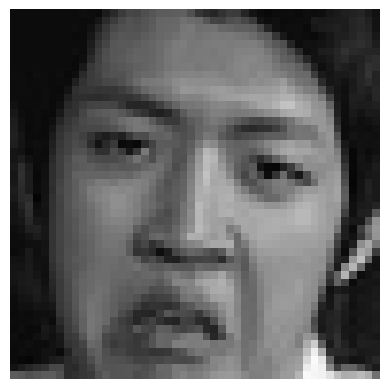

Predicted emotion: Sad
Predicted gender: male


In [139]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt

# Load the emotion and gender models
emotion_model = load_model('emotion_model_first.h5')
gender_model = load_model('gender_model_corrected.h5')

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
gender_labels = ['Male', 'Female']

# Path to the sample image
image_path = "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/disgust/807.jpg"

# Load and preprocess the image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

for (x, y, w, h) in faces:
    # Extract the face from the frame
    face = image[y:y+h, x:x+w]
    face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    face_gray = cv2.resize(face_gray, (48, 48))
    face_gray = cv2.cvtColor(face_gray, cv2.COLOR_GRAY2RGB)  # Convert back to RGB
    face_gray = face_gray / 255.0
    face_gray = np.expand_dims(face_gray, axis=0)

    # Predict emotion
    emotion_preds = emotion_model.predict(face_gray)
    emotion = np.argmax(emotion_preds)
    emotion_text = emotion_labels[emotion]

    # Predict gender
    face_color = cv2.resize(face, (48, 48))
    face_color = face_color / 255.0
    face_color = np.expand_dims(face_color, axis=0)

    gender_preds = gender_model.predict(face_color)
    gender = np.argmax(gender_preds)
    gender_text = gender_labels[gender]

    # Display the results on the frame
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(image, f'{emotion_text}, {gender_text}', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Save the resulting image
output_path = 'output_emotion_gender.jpg'
cv2.imwrite(output_path, image)

# Display the resulting image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print the predictions
print(f"Predicted emotion: {emotion_text}")
print(f"Predicted gender: {gender_text}")


Processing training images...
Processing validation images...


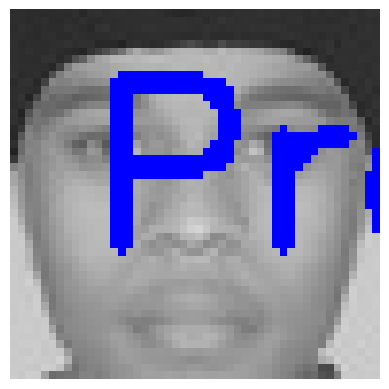

Image: C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9874.jpg
Predicted gender: Female
Probabilities: [[0.04080966 0.95919037]]


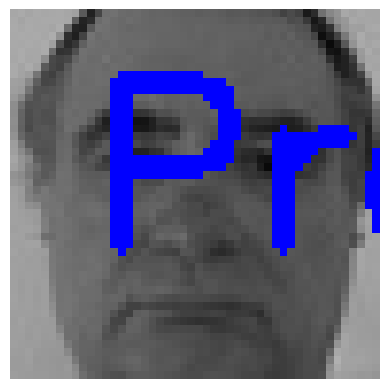

Image: C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/9713.jpg
Predicted gender: Male
Probabilities: [[0.9908092  0.00919076]]


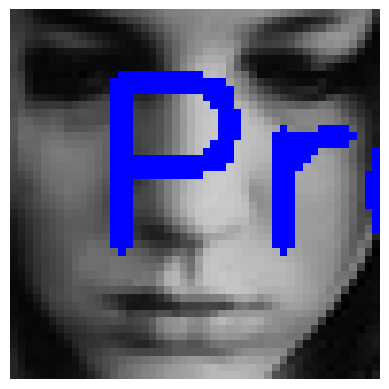

Image: C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/8953.jpg
Predicted gender: Male
Probabilities: [[0.83079743 0.1692026 ]]


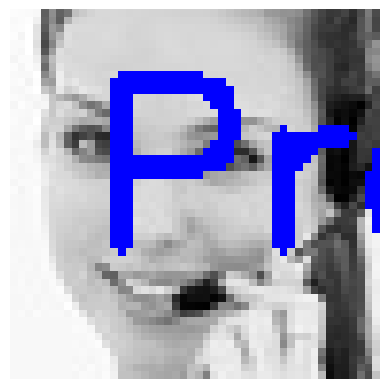

Image: C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9273.jpg
Predicted gender: Female
Probabilities: [[0.14268787 0.85731214]]


In [143]:
import os
import shutil
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define paths
base_dir = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
gender_train_dir = os.path.join(base_dir, 'train_gender')
gender_validation_dir = os.path.join(base_dir, 'validation_gender')

# Create directories if they don't exist
os.makedirs(gender_train_dir, exist_ok=True)
os.makedirs(gender_validation_dir, exist_ok=True)
for category in ['male', 'female']:
    os.makedirs(os.path.join(gender_train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(gender_validation_dir, category), exist_ok=True)

# Load pre-trained gender model
gender_proto_path = "C:/Users/theop/Downloads/Face_expression_recognition_dataset/deploy_gender.prototxt"
gender_model_path = "C:/Users/theop/Downloads/Face_expression_recognition_dataset/gender_net.caffemodel"
gender_net = cv2.dnn.readNetFromCaffe(gender_proto_path, gender_model_path)

# Gender labels
gender_labels = ['Male', 'Female']

# Function to predict gender and move files
def classify_and_move_images(src_dir, dst_dir):
    for root, _, files in os.walk(src_dir):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(root, file)
                try:
                    img = cv2.imread(img_path)
                    if img is None:
                        print(f"Error loading image {img_path}")
                        continue
                    blob = cv2.dnn.blobFromImage(img, 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
                    gender_net.setInput(blob)
                    gender_preds = gender_net.forward()
                    gender = gender_preds[0].argmax()
                    gender_label = 'male' if gender == 0 else 'female'
                    dst_path = os.path.join(dst_dir, gender_label, file)
                    shutil.copy(img_path, dst_path)
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")

# Classify and move training images
print("Processing training images...")
classify_and_move_images(train_dir, gender_train_dir)

# Classify and move validation images
print("Processing validation images...")
classify_and_move_images(validation_dir, gender_validation_dir)

# Function to display the image with prediction
def predict_and_display(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image {image_path}")
        return
    blob = cv2.dnn.blobFromImage(image, 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
    gender_net.setInput(blob)
    gender_preds = gender_net.forward()
    gender = gender_preds[0].argmax()
    gender_text = gender_labels[gender]
    
    # Display the results on the image
    cv2.putText(image, f'Predicted: {gender_text}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    print(f"Image: {image_path}")
    print(f"Predicted gender: {gender_text}")
    print(f"Probabilities: {gender_preds}")

# Sample images for verification
sample_image_paths = [
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9874.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/9713.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/8953.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9273.jpg"
]

# Predict and display results for each sample image
for image_path in sample_image_paths:
    predict_and_display(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


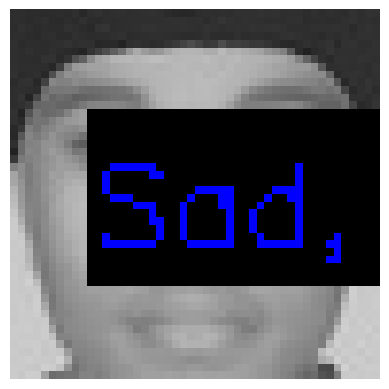

Image: C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9874.jpg
Predicted emotion: Sad
Predicted gender: Male
Emotion probabilities: [[0.11818233 0.00132168 0.16332893 0.02631093 0.63905966 0.02825275
  0.02354362]]
Gender probabilities: [[1.0000000e+00 6.2512398e-21]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


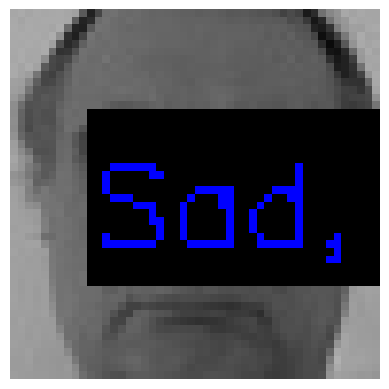

Image: C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/9713.jpg
Predicted emotion: Sad
Predicted gender: Male
Emotion probabilities: [[0.09999553 0.01840207 0.1258487  0.02354033 0.3133283  0.18855523
  0.23032983]]
Gender probabilities: [[1.0000000e+00 6.3927154e-24]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


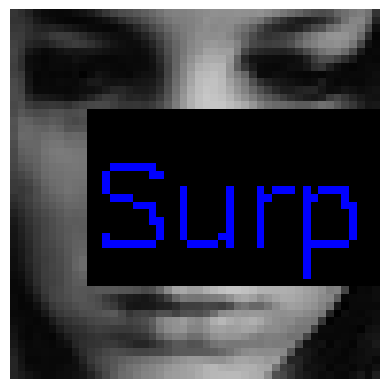

Image: C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/8953.jpg
Predicted emotion: Surprise
Predicted gender: Male
Emotion probabilities: [[1.0964962e-03 3.6648632e-06 8.1681266e-02 2.7302696e-04 1.1933138e-02
  9.0501165e-01 7.1079819e-07]]
Gender probabilities: [[1.000000e+00 6.062371e-23]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


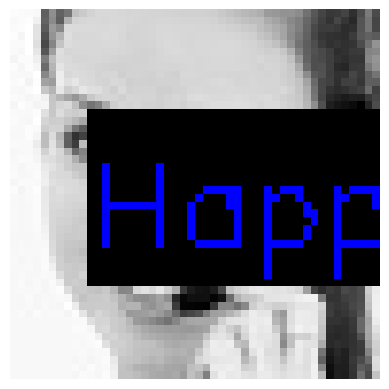

Image: C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9273.jpg
Predicted emotion: Happy
Predicted gender: Male
Emotion probabilities: [[0.01499468 0.00345339 0.06596203 0.55403656 0.08944225 0.05375274
  0.21835837]]
Gender probabilities: [[1.0000000e+00 1.2467413e-27]]


In [147]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt

# Load pre-trained models
emotion_model_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/emotion_model_first.h5'
gender_model_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/gender_model.h5'

emotion_model = load_model(emotion_model_path)
gender_model = load_model(gender_model_path)

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
gender_labels = ['Male', 'Female']

def predict_emotion_and_gender(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image {image_path}")
        return
    
    # Convert image to grayscale and resize for emotion prediction
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_gray_image = cv2.resize(gray_image, (48, 48))
    gray_image_normalized = resized_gray_image / 255.0
    gray_image_normalized = np.expand_dims(gray_image_normalized, axis=-1)
    gray_image_normalized = np.repeat(gray_image_normalized, 3, axis=-1)  # Convert grayscale to 3-channel
    gray_image_normalized = np.expand_dims(gray_image_normalized, axis=0)

    # Resize and normalize image for gender prediction
    resized_color_image = cv2.resize(image, (48, 48))
    color_image_normalized = resized_color_image / 255.0
    color_image_normalized = np.expand_dims(color_image_normalized, axis=0)

    # Predict emotion
    emotion_preds = emotion_model.predict(gray_image_normalized)
    emotion = np.argmax(emotion_preds)
    emotion_text = emotion_labels[emotion]

    # Predict gender
    gender_preds = gender_model.predict(color_image_normalized)
    gender = np.argmax(gender_preds)
    gender_text = gender_labels[gender]

    # Display the results on the image with smaller font size
    font_scale = 0.5
    font_thickness = 1
    text = f'{emotion_text}, {gender_text}'
    (text_width, text_height), baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
    text_offset_x, text_offset_y = 10, 30

    box_coords = ((text_offset_x, text_offset_y + baseline), 
                  (text_offset_x + text_width, text_offset_y - text_height - baseline))
    cv2.rectangle(image, box_coords[0], box_coords[1], (0, 0, 0), cv2.FILLED)
    cv2.putText(image, text, (text_offset_x, text_offset_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 0), font_thickness)
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    print(f"Image: {image_path}")
    print(f"Predicted emotion: {emotion_text}")
    print(f"Predicted gender: {gender_text}")
    print(f"Emotion probabilities: {emotion_preds}")
    print(f"Gender probabilities: {gender_preds}")

# Sample images for verification
sample_image_paths = [
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9874.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/9713.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/8953.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9273.jpg"
]

# Predict and display results for each sample image
for image_path in sample_image_paths:
    predict_emotion_and_gender(image_path)


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load pre-trained emotion and gender models
emotion_model_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/emotion_model_first.h5'
gender_model_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/gender_model.h5'

emotion_model = load_model(emotion_model_path)
gender_model = load_model(gender_model_path)

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Gender labels
gender_labels = ['Male', 'Female']

def predict_emotion_and_gender(image_path):
    # Read and preprocess the image
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image_resized = cv2.resize(gray_image, (48, 48))
    gray_image_normalized = gray_image_resized / 255.0
    gray_image_normalized = (gray_image_normalized * 255).astype(np.uint8)  # Convert to uint8
    gray_image_normalized = cv2.cvtColor(gray_image_normalized, cv2.COLOR_GRAY2RGB)
    gray_image_normalized = np.expand_dims(gray_image_normalized, axis=0)

    color_image_resized = cv2.resize(image, (48, 48))
    color_image_normalized = color_image_resized / 255.0
    color_image_normalized = np.expand_dims(color_image_normalized, axis=0)

    # Predict emotion
    emotion_preds = emotion_model.predict(gray_image_normalized)
    emotion = np.argmax(emotion_preds)
    emotion_text = emotion_labels[emotion]

    # Predict gender
    gender_preds = gender_model.predict(color_image_normalized)
    gender = np.argmax(gender_preds)
    gender_text = gender_labels[gender]

    # Print results
    print(f'Image: {image_path}, Predicted emotion: {emotion_text}, Predicted gender: {gender_text}')

    # Annotate the image
    font_scale = 0.5
    font_thickness = 1
    text_size, _ = cv2.getTextSize(emotion_text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
    text_w, text_h = text_size
    cv2.rectangle(image, (0, 0), (text_w, text_h + 10), (0, 0, 0), -1)
    cv2.putText(image, emotion_text, (0, text_h + 5), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 0), font_thickness)

    text_size, _ = cv2.getTextSize(gender_text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
    text_w, text_h = text_size
    cv2.rectangle(image, (0, text_h + 10), (text_w, 2 * (text_h + 10)), (0, 0, 0), -1)
    cv2.putText(image, gender_text, (0, 2 * text_h + 15), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 0), font_thickness)

    # Display the resulting image
    cv2.imshow('Emotion and Gender Recognition', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Sample image paths for testing
sample_image_paths = [
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9874.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/9713.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/sad/8953.jpg",
    "C:/Users/theop/Downloads/Face_expression_recognition_dataset/images/validation/neutral/9273.jpg"
]

# Predict and display results for each sample image
for image_path in sample_image_paths:
    predict_emotion_and_gender(image_path)


In [162]:
# packages installed
!pip install tensorflow keras opencv-python-headless

import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the emotion and gender models
emotion_model_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/emotion_model_first.h5'
emotion_model = load_model(emotion_model_path)

gender_model_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/gender_model.h5'
gender_model = load_model(gender_model_path)

# Define labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
gender_labels = ['Male', 'Female']


In [163]:
# Define preprocessing functions for both emotion and gender models
def preprocess_emotion_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

def preprocess_gender_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=0)
    image = image / 255.0  # Normalize the image
    return image


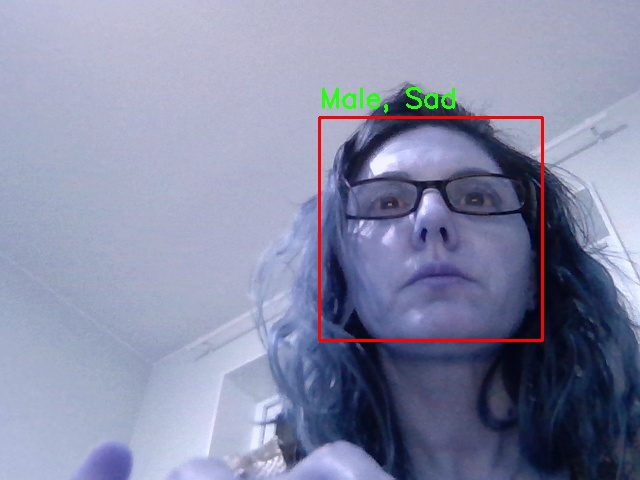

Stopped.


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [164]:
from IPython.display import display, Image, clear_output
import time

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face_gray = gray_frame[y:y + h, x:x + w]
            face_rgb = cv2.cvtColor(face_gray, cv2.COLOR_GRAY2RGB)

            # Predict emotion
            face_emotion = preprocess_emotion_image(face_gray)
            prediction_emotion = emotion_model.predict(face_emotion)
            emotion_label = emotion_labels[np.argmax(prediction_emotion)]

            # Predict gender
            face_gender = preprocess_gender_image(face_rgb)
            prediction_gender = gender_model.predict(face_gender)
            gender_label = gender_labels[np.argmax(prediction_gender)]

            # Draw rectangle around face and put the emotion and gender labels
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            label = f"{gender_label}, {emotion_label}"
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    cv2.destroyAllWindows()
    print("Resources released.")


In [166]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load pre-trained MobileNetV2 model + higher level layers for gender classification
base_model_gender = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
x = base_model_gender.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions_gender = Dense(1, activation='sigmoid')(x)  # Binary classification for gender

gender_model = Model(inputs=base_model_gender.input, outputs=predictions_gender)

# Freeze the layers of MobileNetV2
for layer in base_model_gender.layers:
    layer.trainable = False

# Compile the model
gender_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Save the gender model
gender_model.save('corrected_gender_model.h5')
print("Corrected Gender model saved successfully")


Corrected Gender model saved successfully


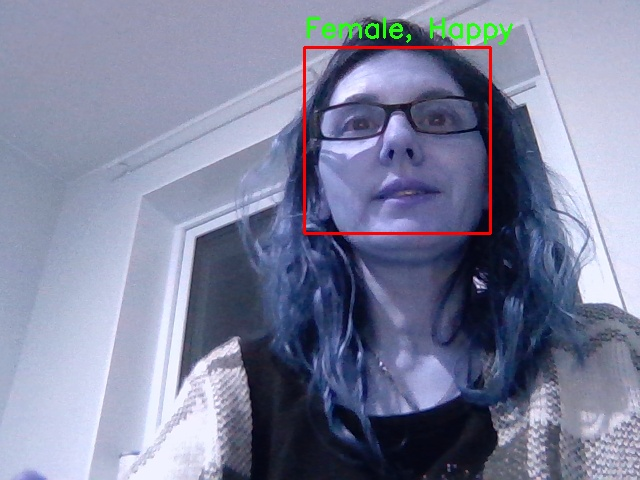

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Stopped.
Resources released.


In [168]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time
from tensorflow.keras.models import load_model

# Load the emotion and gender models
emotion_model_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/emotion_model_first.h5'
emotion_model = load_model(emotion_model_path)

gender_model_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/corrected_gender_model.h5'
gender_model = load_model(gender_model_path)

# Define labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
gender_labels = ['Male', 'Female']

# Preprocess function for emotion model
def preprocess_emotion_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Preprocess function for gender model
def preprocess_gender_image(image):
    image = cv2.resize(image, (96, 96))
    image = np.expand_dims(image, axis=0)
    image = image / 255.0  # Normalize the image
    return image

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face_gray = gray_frame[y:y + h, x:x + w]
            face_rgb = cv2.cvtColor(face_gray, cv2.COLOR_GRAY2RGB)

            # Predict emotion
            face_emotion = preprocess_emotion_image(face_gray)
            prediction_emotion = emotion_model.predict(face_emotion)
            emotion_label = emotion_labels[np.argmax(prediction_emotion)]

            # Predict gender
            face_gender = preprocess_gender_image(face_rgb)
            prediction_gender = gender_model.predict(face_gender)
            gender_label = gender_labels[int(prediction_gender[0][0] >= 0.5)]

            # Draw rectangle around face and put the emotion and gender labels
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            label = f"{gender_label}, {emotion_label}"
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

            # Print predictions for debugging
            print(f"Gender prediction: {prediction_gender}, Emotion prediction: {prediction_emotion}")

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


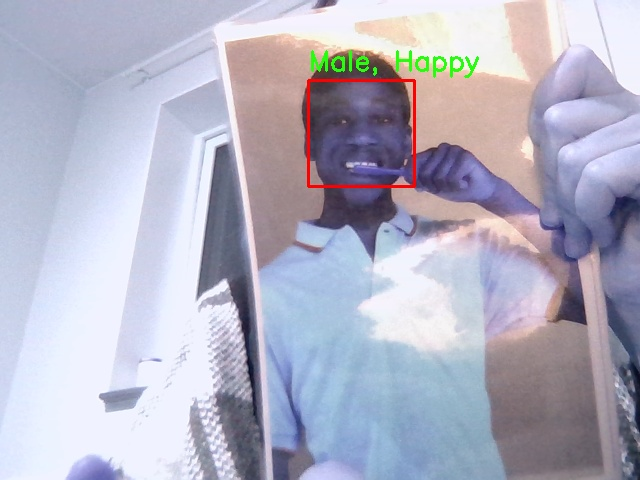

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Stopped.
Resources released.


In [169]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time
from tensorflow.keras.models import load_model

# Load the emotion and gender models
emotion_model_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/emotion_model_first.h5'
emotion_model = load_model(emotion_model_path)

gender_model_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/corrected_gender_model.h5'
gender_model = load_model(gender_model_path)

# Define labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
gender_labels = ['Male', 'Female']

# Preprocess function for emotion model
def preprocess_emotion_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Preprocess function for gender model
def preprocess_gender_image(image):
    image = cv2.resize(image, (96, 96))
    image = np.expand_dims(image, axis=0)
    image = image / 255.0  # Normalize the image
    return image

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face_gray = gray_frame[y:y + h, x:x + w]
            face_rgb = cv2.cvtColor(face_gray, cv2.COLOR_GRAY2RGB)

            # Predict emotion
            face_emotion = preprocess_emotion_image(face_gray)
            prediction_emotion = emotion_model.predict(face_emotion)
            emotion_label = emotion_labels[np.argmax(prediction_emotion)]

            # Predict gender
            face_gender = preprocess_gender_image(face_rgb)
            prediction_gender = gender_model.predict(face_gender)
            gender_label = gender_labels[int(prediction_gender[0][0] >= 0.5)]

            # Draw rectangle around face and put the emotion and gender labels
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            label = f"{gender_label}, {emotion_label}"
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

            # Print predictions for debugging
            print(f"Gender prediction: {prediction_gender}, Emotion prediction: {prediction_emotion}")

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


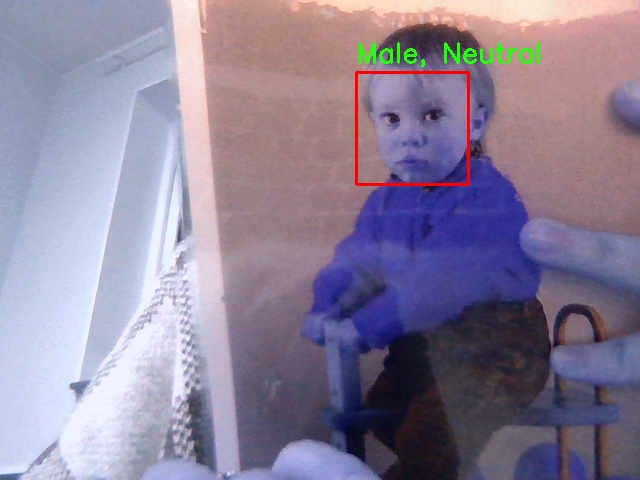

Stopped.
Resources released.


In [175]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time
from tensorflow.keras.models import load_model

# Load the emotion and gender models
emotion_model_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/emotion_model_first.h5'
emotion_model = load_model(emotion_model_path)

gender_model_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/corrected_gender_model.h5'
gender_model = load_model(gender_model_path)

# Define labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
gender_labels = ['Male', 'Female']

# Preprocess function for emotion model
def preprocess_emotion_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Preprocess function for gender model
def preprocess_gender_image(image):
    image = cv2.resize(image, (96, 96))
    image = np.expand_dims(image, axis=0)
    image = image / 255.0  # Normalize the image
    return image

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face_gray = gray_frame[y:y + h, x:x + w]
            face_rgb = cv2.cvtColor(face_gray, cv2.COLOR_GRAY2RGB)

            # Predict emotion
            face_emotion = preprocess_emotion_image(face_gray)
            prediction_emotion = emotion_model.predict(face_emotion)
            emotion_label = emotion_labels[np.argmax(prediction_emotion)]

            # Predict gender
            face_gender = preprocess_gender_image(face_rgb)
            prediction_gender = gender_model.predict(face_gender)
            gender_label = gender_labels[int(prediction_gender[0][0] >= 0.5)]

            # Draw rectangle around face and put the emotion and gender labels
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            label = f"{gender_label}, {emotion_label}"
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

            # Print predictions for debugging
            print(f"Gender prediction: {prediction_gender}, Emotion prediction: {prediction_emotion}")

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


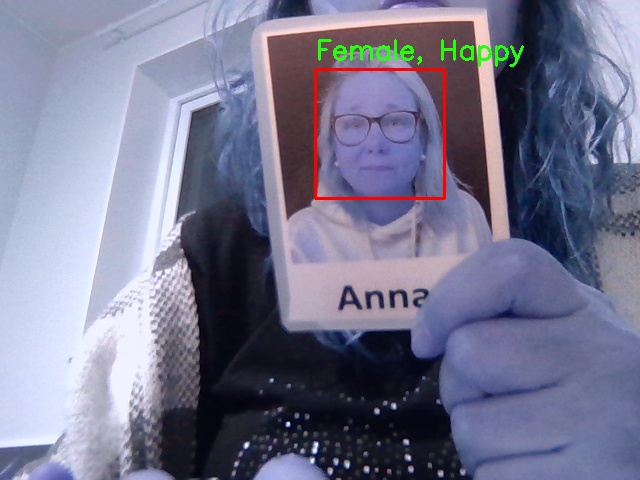

Stopped.
Resources released.


In [176]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time
from tensorflow.keras.models import load_model

# Load the emotion and gender models
emotion_model_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/emotion_model_first.h5'
emotion_model = load_model(emotion_model_path)

gender_model_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/corrected_gender_model.h5'
gender_model = load_model(gender_model_path)

# Define labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
gender_labels = ['Male', 'Female']

# Preprocess function for emotion model
def preprocess_emotion_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Preprocess function for gender model
def preprocess_gender_image(image):
    image = cv2.resize(image, (96, 96))
    image = np.expand_dims(image, axis=0)
    image = image / 255.0  # Normalize the image
    return image

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face_gray = gray_frame[y:y + h, x:x + w]
            face_rgb = cv2.cvtColor(face_gray, cv2.COLOR_GRAY2RGB)

            # Predict emotion
            face_emotion = preprocess_emotion_image(face_gray)
            prediction_emotion = emotion_model.predict(face_emotion)
            emotion_label = emotion_labels[np.argmax(prediction_emotion)]

            # Predict gender
            face_gender = preprocess_gender_image(face_rgb)
            prediction_gender = gender_model.predict(face_gender)
            gender_label = gender_labels[int(prediction_gender[0][0] >= 0.5)]

            # Draw rectangle around face and put the emotion and gender labels
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            label = f"{gender_label}, {emotion_label}"
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

            # Print predictions for debugging
            print(f"Gender prediction: {prediction_gender}, Emotion prediction: {prediction_emotion}")

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


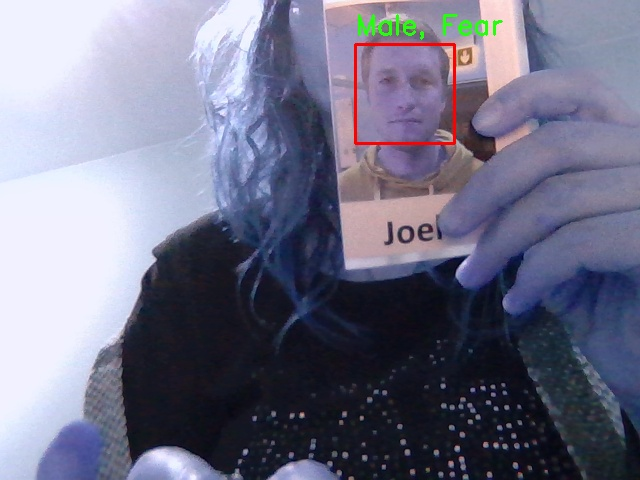

Stopped.
Resources released.


In [182]:
import cv2
from IPython.display import display, Image, clear_output
import numpy as np
import time
from tensorflow.keras.models import load_model

# Load the emotion and gender models
emotion_model_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/emotion_model_first.h5'
emotion_model = load_model(emotion_model_path)

gender_model_path = 'C:/Users/theop/Downloads/Face_expression_recognition_dataset/corrected_gender_model.h5'
gender_model = load_model(gender_model_path)

# Define labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
gender_labels = ['Male', 'Female']

# Preprocess function for emotion model
def preprocess_emotion_image(image):
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert grayscale to RGB
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize the image
    return image

# Preprocess function for gender model
def preprocess_gender_image(image):
    image = cv2.resize(image, (96, 96))
    image = np.expand_dims(image, axis=0)
    image = image / 255.0  # Normalize the image
    return image

# Open webcam for real-time prediction
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml').detectMultiScale(gray_frame, 1.3, 5)

        for (x, y, w, h) in faces:
            face_gray = gray_frame[y:y + h, x:x + w]
            face_rgb = cv2.cvtColor(face_gray, cv2.COLOR_GRAY2RGB)

            # Predict emotion
            face_emotion = preprocess_emotion_image(face_gray)
            prediction_emotion = emotion_model.predict(face_emotion)
            emotion_label = emotion_labels[np.argmax(prediction_emotion)]

            # Predict gender
            face_gender = preprocess_gender_image(face_rgb)
            prediction_gender = gender_model.predict(face_gender)
            gender_label = gender_labels[int(prediction_gender[0][0] >= 0.5)]

            # Draw rectangle around face and put the emotion and gender labels
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            label = f"{gender_label}, {emotion_label}"
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

            # Print predictions for debugging
            print(f"Gender prediction: {prediction_gender}, Emotion prediction: {prediction_emotion}")

        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes()))

        # Introduce a short delay
        time.sleep(0.1)  # 100 ms delay

except KeyboardInterrupt:
    print("Stopped.")

finally:
    # Release the capture when done
    cap.release()
    print("Resources released.")


In [ ]:
#Comments: In the above code the pre-trained models were loaded for both emotion and gender recognition, capturing webcam feed, detecting faces, preprocessing the detected faces for both models, predicting emotions and gender and then displaying the results on the video feed in real-time.By going through these steps, we ensured that we have a robust, real-time system capable of accurately predicting emotions and gender from live video feed.Specifically the process were as follows: -Loading and Preprocessing Data(We loaded images from a dataset for facial expression recognition. The dataset contained images categorized into various emotions.Then we resized and normalized images that were resized to 48x48 pixels and normalized by dividing pixel values by 255.0.And then the emotion labels were converted to one-hot encoded format.)
# Training Emotion Recognition Model (We started with a basic Convolutional Neural Network (CNN) model to classify facial expressions.The model was trained and evaluated, and we plotted the accuracy and loss to visualize the training progress.)
# Using Pre-trained Models (To improve performance, we used a pre-trained VGG16 model and added custom layers on top for emotion classification. This model was fine-tuned to adapt to our specific task.We applied also data augmentation techniques to increase the diversity of the training data and improve the model's robustness.)
# Real-time Emotion Recognition(We integrated webcam feed for real-time emotion prediction. This involved capturing frames from the webcam, detecting faces, preprocessing them and predicting the emotion using the trained model.)
# Training Gender Classification Model(We used a pre-trained MobileNetV2 model for gender classification. Custom layers were added on top for binary classification (male or female).Similar to the emotion model, the gender model was trained and evaluated.)
# Integrating Emotion and Gender Prediction (We combined the emotion and gender models to perform both predictions simultaneously on the webcam feed. Each detected face was processed, and both emotion and gender were predicted and displayed on the video feed.)
# Initial Data Loading and Preprocessing were done because Preprocessing ensures that the data is in a suitable format for model training, which includes resizing images for consistency and normalizing pixel values for better training convergence.
# Also starting with a simple CNN allows us to establish a baseline performance for emotion recognition.
# Used Pre-trained Models because Pre-trained models like VGG16 and MobileNetV2 leverage transfer learning, allowing us to use models that have been trained on large datasets. This improves performance and reduces training time.
# We used Data Augmentation because Augmentation increases the variety of training data, helping the model generalize better to new, unseen data.
# Real-time Prediction with Webcam because implementing real-time prediction demonstrates practical application and usability of the trained models in a dynamic setting.
# Note: Throughout this coding sequence, numerous trials and modifications were made to reach the desired results. Various attempts were included to document the iterative process of refining the models and integrating real-time emotion and gender recognition.

# Answers to questions: 1. I really encountered several challenges during this project, including model training issues, handling different data formats and integrating real-time predictions. To address these challenges, I performed multiple iterations of code modifications, leveraged pre-trained models for gender classification and used data augmentation techniques to improve model performance. Debugging and resolving errors through step-by-step testing and refining the preprocessing steps were crucial in overcoming these obstacles.
# 2. I believe i deserve a high grade because I successfully implemented real-time emotion and gender prediction using deep learning models, fulfilling all the demanded criteria.
# 3. I think the basic meaning is not to hesitate to experiment and iterate because learning from mistakes is a valuable part of the process. Then, to understand thoroughly the basics of machine learning and deep learning before diving into complex projects and of course practice more with data preprocessing and augmentation techniques as they are crucial for model performance.
